In [14]:
import gpytorch
import numpy as np
import GPyOpt
import copy
import numpy as np
import array
import random
import matplotlib.pyplot as plt
import torch

from gpytorch.kernels import ScaleKernel
from gpytorch.kernels import MaternKernel
from scipy.stats import norm
from deap import base
from deap.benchmarks.tools import hypervolume
from deap import creator
from deap import tools
from deap import algorithms
import datetime
from pyDOE2 import lhs
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [15]:
'''
multi object functions
'''


def zdt1(x: np.ndarray) -> np.ndarray:
    """
    Args:
        x (np.ndarray): x must be in [0, 1]
    Returns:
        multi_objective_value (np.ndarray):
    """
    if type(x) is not np.ndarray:
        x_in = np.array(x)
    else:
        x_in = copy.deepcopy(x)
    if np.any(x_in > 1) or np.any(x_in < 0):
        raise ValueError('0 <= x <= 1 is required')
    n_dv = x_in.shape[0]
    x_in = x_in.T
    
    
    g = 1 + 9 * sum(x_in[1:]) / (n_dv - 1)
    h = 1 - np.sqrt(x_in[0] / g)
    f1 = x_in[0]
    f2 = g * h
    return np.array([f1, f2])


def zdt2(x: np.ndarray) -> np.ndarray:
    """
    Args:
        x (np.ndarray): x must be in [0, 1]
    Returns:
        multi_objective_value (np.ndarray):
    """
    if type(x) is not np.ndarray:
        x_in = np.array(x)
    else:
        x_in = copy.deepcopy(x)
    if np.any(x_in > 1) or np.any(x_in < 0):
        raise ValueError('0 <= x <= 1 is required')
    n_dv = x_in.shape[0]
    x_in = x_in.T

    
    g = 1 + 9 * sum(x_in[1:]) / (n_dv - 1)
    h = 1 - (x_in[0] / g) ** 2
    f1 = x_in[0]
    f2 = g * h
    return np.array([f1, f2])

def zdt3(x: np.ndarray) -> np.ndarray:
    """
    Args:
        x (np.ndarray): x must be in [0, 1]
    Returns:
        multi_objective_value (np.ndarray):
    """
    if type(x) is not np.ndarray:
        x_in = np.array(x)
    else:
        x_in = copy.deepcopy(x)
    if np.any(x_in > 1) or np.any(x_in < 0):
        raise ValueError('0 <= x <= 1 is required')
    n_dv = x_in.shape[0]
    x_in = x_in.T
    
    
    g = 1 + 9 * sum(x_in[1:]) / (n_dv - 1)
    h = 1 - np.sqrt(x_in[0] / g) - x_in[0]/g * np.sin(10 * np.pi * x_in[0])
    f1 = x_in[0]
    f2 = g * h
    return np.array([f1, f2])

def zdt4(x: np.ndarray) -> np.ndarray:
    """
    Args:
        x (np.ndarray): x must be in [0, 1]
    Returns:
        multi_objective_value (np.ndarray):
    """
    if type(x) is not np.ndarray:
        x_in = np.array(x)
    else:
        x_in = copy.deepcopy(x)
    if np.any(x_in > 1) or np.any(x_in < 0):
        raise ValueError('0 <= x <= 1 is required')
    n_dv = x_in.shape[0]
    x_in = x_in.T
    
    
    g = 1 + 10 * (n_dv-1) * sum(np.sqrt(x_in[1:]) - 10 * np.cos(4 * np.pi * x_in[1:]))
    h = 1 - np.sqrt(x_in[0] / g)
    f1 = x_in[0]
    f2 = g * h
    return np.array([f1, f2])

def schaffer(x: np.ndarray) -> np.ndarray:
    """
    Args:
        x (np.ndarray): x must be in [0, 1]
    Returns:
        multi_objective_value (np.ndarray):
    """
    if type(x) is not np.ndarray:
        x_in = np.array(x)
    else:
        x_in = copy.deepcopy(x)
    if np.any(x_in > 1) or np.any(x_in < 0):
        raise ValueError('0 <= x <= 1 is required')
    x_in = x_in.T

    f1 = x_in[0]**2
    f2 = (x_in[0]-2)**2
    return np.array([f1, f2])


def binh_korn(x: np.ndarray) -> np.ndarray:
    """
    Args:
        x (np.ndarray): x must be in [0, 1]
    Returns:
        multi_objective_value (np.ndarray):
    """
    if type(x) is not np.ndarray:
        x_in = np.array(x)
    else:
        x_in = copy.deepcopy(x)
    if np.any(x_in > 1) or np.any(x_in < 0):
        raise ValueError('0 <= x <= 1 is required')

    #x_in = copy.deepcopy(x)
    x_in = x_in.T
    x_in[0] = x_in[0] * 5
    x_in[1] = x_in[1] * 3

    f1 = 4 * (x_in[0] ** 2) + 4 * (x_in[1] ** 2)
    f2 = (x_in[0] - 5) ** 2 + (x_in[1] - 5) ** 2
    g1 = (x_in[0] - 5) ** 2 + x_in[1] ** 2 - 25
    g2 = 7.7 - (x_in[0] - 8) ** 2 + (x_in[1] + 3) ** 2
    return np.array([f1, f2, g1, g2])


def chakong_haimes(x: np.ndarray) -> np.ndarray:
    """
    Args:
        x (np.ndarray): x must be in [0, 1]
    Returns:
        multi_objective_value (np.ndarray):
    """
    if type(x) is not np.ndarray:
        x_in = np.array(x)
    else:
        x_in = copy.deepcopy(x)
    if np.any(x_in > 1) or np.any(x_in < 0):
        raise ValueError('0 <= x <= 1 is required')
    #x_in = copy.deepcopy(x)
    x_in = x_in.T
    x_in[0] = x_in[0] * 40 - 20
    x_in[1] = x_in[1] * 40 - 20

    f1 = 2 + (x_in[0] - 2) ** 2 + (x_in[1] - 1) ** 2
    f2 = 9 * x_in[0] - (x_in[1] - 1) ** 2
    g1 = x_in[0] ** 2 + x_in[1] ** 2 - 255
    g2 = x_in[0] - 3 * x_in[1] + 10

    return np.array([f1, f2, g1, g2])


def osyczka_kundu(x: np.ndarray) -> np.ndarray:
    """
    Args:
        x (np.ndarray): x must be in [0, 1]
    Returns:
        multi_objective_value (np.ndarray):
    """
    if type(x) is not np.ndarray:
        x_in = np.array(x)
    else:
        x_in = copy.deepcopy(x)
    if np.any(x_in > 1) or np.any(x_in < 0):
        raise ValueError('0 <= x <= 1 is required')
    #x_in = copy.deepcopy(x)
    x_in = x_in.T
    x_in[0] = x_in[0] * 10
    x_in[1] = x_in[1] * 10
    x_in[2] = x_in[2] * 4 + 1
    x_in[3] = x_in[3] * 6
    x_in[4] = x_in[4] * 4 + 1
    x_in[5] = x_in[5] * 10

    f1 = -25 * (x_in[0] - 2) ** 2 - (x_in[1] - 2) ** 2
    - (x_in[2] - 1) ** 2 - (x_in[3] - 4) ** 2
    - (x_in[4] - 1) ** 2
    f2 = 0
    for i in range(0, 6):
        f2 = f2 + x_in[i] ** 2
    g1 = (x_in[0] + x_in[1] - 2)
    g2 = (6 - x_in[0] - x_in[1])
    g3 = (2 + x_in[1] - x_in[0])
    g4 = (2 - x_in[0] + 3 * x_in[1])
    g5 = (4 - (x_in[2] - 3) ** 2 - x_in[3])
    g6 = ((x_in[4] - 3) ** 2 + x_in[5] - 4)
    return np.array([f1, f2, g1, g2, g3, g4, g5, g6])



In [16]:
'''
exact gp
'''

class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = ScaleKernel(
            MaternKernel(5/2, ard_num_dims=train_x.shape[1]))

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
    

In [17]:
'''
acquisition function
'''

class acquisition:
    def ei(y_pred, y_train):
        mean = y_pred.mean.numpy()[0],
        std = y_pred.stddev.numpy()[0],
        y_min = y_train.numpy().min()
        z = (mean - y_min) / std
        out = (mean - y_min) * norm.cdf(z) + std * norm.pdf(z)
        return out[0]

    def ucb(y_pred, y_train):
        mean = y_pred.mean.numpy()[0],
        std = y_pred.stddev.numpy()[0],
        n_sample = y_train.numpy().shape[0]
        out = mean[0] + (np.sqrt(np.log(n_sample) / n_sample)) * std[0]

        return out



In [18]:
'''
multi object optimizer=NSGA2
'''


class NSGA2():
    def __init__(self,
                 evaluation_function=None,
                 bound_low=0.0,
                 bound_up=1.0,
                 n_design_variables_dimension=30,
                 n_population=16,
                 n_generation=50,
                 crossover_probability=0.9,
                 random_seed=9):
        self.random_seed = random_seed
        random.seed(self.random_seed)

        self.toolbox = base.Toolbox()
        self.evaluation_function = evaluation_function
        self.bound_low = bound_low
        self.bound_up = bound_up
        self.n_design_variables_dimension =\
            n_design_variables_dimension
        self.n_population = n_population
        self.n_generation = n_generation
        self.crossover_probability = crossover_probability

    def setup(self):
        creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
        creator.create("Individual", array.array, typecode='d',
                       fitness=creator.FitnessMin)

        self.toolbox.register("attr_float", self.uniform,
                              self.bound_low, self.bound_up,
                              self.n_design_variables_dimension)
        self.toolbox.register("individual", tools.initIterate,
                              creator.Individual, self.toolbox.attr_float)
        self.toolbox.register("population", tools.initRepeat,
                              list, self.toolbox.individual)

        if self.evaluation_function:
            self.toolbox.register("evaluate", self.evaluation_function)

        self.toolbox.register("mate", tools.cxSimulatedBinaryBounded,
                              low=self.bound_low, up=self.bound_up, eta=20.0)
        self.toolbox.register("mutate", tools.mutPolynomialBounded,
                              low=self.bound_low, up=self.bound_up, eta=20.0,
                              indpb=1.0 / self.n_design_variables_dimension)
        self.toolbox.register("select", tools.selNSGA2)

        self.stats = tools.Statistics(lambda ind: ind.fitness.values)
        self.stats.register("avg", np.mean, axis=0)
        self.stats.register("std", np.std, axis=0)
        self.stats.register("min", np.min, axis=0)
        self.stats.register("max", np.max, axis=0)
        self.logbook = tools.Logbook()
        self.logbook.header = "gen", "evals", "std", "min", "avg", "max"
        self.pop = self.toolbox.population(n=self.n_population)

    def run(self):
        self.setup()
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in self.pop if not ind.fitness.valid]
        fitnesses = list(
            (self.toolbox.map(self.toolbox.evaluate, invalid_ind)))
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # This is just to assign the crowding distance to the individuals
        # no actual selection is done
        self.pop = self.toolbox.select(self.pop, len(self.pop))

        record = self.stats.compile(self.pop)
        self.logbook.record(gen=0, evals=len(invalid_ind), **record)
        print(self.logbook.stream)

        # Begin the generational process
        for i_generation in range(1, self.n_generation):
            # Vary the population
            offspring = tools.selTournamentDCD(self.pop, len(self.pop))
            offspring = [self.toolbox.clone(ind) for ind in offspring]

            for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
                if random.random() <= self.crossover_probability:
                    self.toolbox.mate(ind1, ind2)

                self.toolbox.mutate(ind1)
                self.toolbox.mutate(ind2)
                del ind1.fitness.values, ind2.fitness.values

            # Evaluate the individuals with an invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = self.toolbox.map(self.toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit

            # Select the next generation population
            self.pop = self.toolbox.select(
                self.pop + offspring, self.n_population)
            record = self.stats.compile(self.pop)
            self.logbook.record(
                gen=i_generation, evals=len(invalid_ind), **record)
            print(self.logbook.stream)

        print("Final population hypervolume is %f" %
              hypervolume(self.pop, [11.0, 11.0]))
        return self.pop, self.logbook

    def uniform(self, low, up, size=None):
        try:
            return [random.uniform(a, b) for a, b in zip(low, up)]
        except TypeError:
            return [random.uniform(a, b) for a, b in zip([low] * size,
                                                         [up] * size)]

In [19]:
'''
multi object optimizer=NSGA3
'''

class NSGA3():
    def __init__(self,
                 evaluation_function=None,
                 bound_low=0.0,
                 bound_up=1.0,
                 n_design_variables_dimension=30,
                 n_population=16,
                 n_generation=50,
                 crossover_probability=0.9,
                 random_seed=9):
        self.random_seed = random_seed
        random.seed(self.random_seed)

        self.toolbox = base.Toolbox()
        self.evaluation_function = evaluation_function
        self.bound_low = bound_low
        self.bound_up = bound_up
        self.n_design_variables_dimension =\
            n_design_variables_dimension
        self.n_population = n_population
        self.n_generation = n_generation
        self.crossover_probability = crossover_probability
        self.CXPB=1.0
        self.MUTPB=1.0
    
    def setup(self):
        creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
        creator.create("Individual", array.array, typecode='d',
                       fitness=creator.FitnessMin)
        
        self.toolbox.register("attr_float", self.uniform,
                              self.bound_low, self.bound_up,
                              self.n_design_variables_dimension)
        self.toolbox.register("individual", tools.initIterate,
                              creator.Individual, self.toolbox.attr_float)
        self.toolbox.register("population", tools.initRepeat,
                              list, self.toolbox.individual)

        if self.evaluation_function:
            self.toolbox.register("evaluate", self.evaluation_function)

        self.toolbox.register("mate", tools.cxSimulatedBinaryBounded,
                              low=self.bound_low, up=self.bound_up, eta=20.0)
        self.toolbox.register("mutate", tools.mutPolynomialBounded,
                              low=self.bound_low, up=self.bound_up, eta=20.0,
                              indpb=1.0 / self.n_design_variables_dimension)
        
        ref_points = tools.uniform_reference_points(2, self.n_population)
        self.toolbox.register("select", tools.selNSGA3,ref_points=ref_points)
        
        self.stats = tools.Statistics(lambda ind: ind.fitness.values)
        self.stats.register("avg", np.mean, axis=0)
        self.stats.register("std", np.std, axis=0)
        self.stats.register("min", np.min, axis=0)
        self.stats.register("max", np.max, axis=0)
        self.logbook = tools.Logbook()
        self.logbook.header = "gen", "evals", "std", "min", "avg", "max"
        self.pop = self.toolbox.population(n=self.n_population)
        
        
    def run(self):
        self.setup()
       
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in self.pop if not ind.fitness.valid]
        fitnesses = list(
            (self.toolbox.map(self.toolbox.evaluate, invalid_ind)))
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # This is just to assign the crowding distance to the individuals
        # no actual selection is done
        self.pop = self.toolbox.select(self.pop, len(self.pop))

        record = self.stats.compile(self.pop)
        self.logbook.record(gen=0, evals=len(invalid_ind), **record)
        print(self.logbook.stream)

        # Begin the generational process
        for i_generation in range(1, self.n_generation):
            # Vary the population
            #offspring = tools.selTournamentDCD(self.pop, len(self.pop))
            #offspring = [self.toolbox.clone(ind) for ind in offspring]
            offspring = algorithms.varAnd(self.pop, self.toolbox, self.CXPB, self.MUTPB)
            '''
            for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
                if random.random() <= self.crossover_probability:
                    self.toolbox.mate(ind1, ind2)

                self.toolbox.mutate(ind1)
                self.toolbox.mutate(ind2)
                del ind1.fitness.values, ind2.fitness.values
            '''
            # Evaluate the individuals with an invalid fitness
            '''
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = self.toolbox.map(self.toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit
            '''
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = self.toolbox.map(self.toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit

            # Select the next generation population
            self.pop = self.toolbox.select(
                self.pop + offspring, self.n_population)
            record = self.stats.compile(self.pop)
            self.logbook.record(
                gen=i_generation, evals=len(invalid_ind), **record)
            print(self.logbook.stream)

        print("Final population hypervolume is %f" %
              hypervolume(self.pop, [11.0, 11.0]))
        return self.pop, self.logbook
    
    def uniform(self, low, up, size=None):
        try:
            return [random.uniform(a, b) for a, b in zip(low, up)]
        except TypeError:
            return [random.uniform(a, b) for a, b in zip([low] * size,
                                                         [up] * size)]
    



In [23]:
'''
bayesopt
'''
import copy
import numpy as np
import torch
import gpytorch
from pyDOE2 import lhs
from sklearn.cluster import KMeans


class MultiObjectiveBayesianOpt():
    def __init__(self,
                 evaluation_function=None,
                 Initializer=lhs,
                 surrogate_model=ExactGPModel,
                 optimizer=NSGA2,
                 acquisition=acquisition.ei,
                 n_objective_dimension=2,
                 n_design_variables_dimension=30,
                 n_initial_sample=16,
                 bayesian_optimization_iter_max=10,
                 likelihood_optimization_iter_max=500,#5000
                 likelihood_optimization_criteria=1e-8,
                 n_new_samples=8,
                 n_ga_population=100,
                 n_ga_generation=500,#100
                 batch_size=10
                 ):
        self.Initializer = Initializer
        self.surrogate_model = surrogate_model
        self.model = [None] * n_objective_dimension
        self.likelihood = [None] * n_objective_dimension
        self.optimizer = optimizer
        self.evaluation_function = evaluation_function
        self.acquisition = acquisition
        self.n_objective_dimension = n_objective_dimension
        self.n_design_variables_dimension = n_design_variables_dimension
        self.n_initial_sample = n_initial_sample
        self.train_x = None
        self.train_y = [None] * n_objective_dimension
        self.new_x = None
        self.bayesian_optimization_iter_max = \
            bayesian_optimization_iter_max
        self.likelihood_optimization_iter_max = \
            likelihood_optimization_iter_max
        self.likelihood_optimization_criteria = \
            likelihood_optimization_criteria
        self.n_new_samples = n_new_samples
        self.n_ga_population = n_ga_population
        self.n_ga_generation = n_ga_generation
        self.batch_size=batch_size

    def _initialize(self):
        self.train_x = self.Initializer(
            self.n_design_variables_dimension,
            self.n_initial_sample).astype(np.float32)
        self.train_x = torch.from_numpy(self.train_x)
        self.train_y = torch.from_numpy(
            self.evaluation_function(self.train_x).T)
        return

    def _train_likelihood(self):
        
        for i_obj in range(self.n_objective_dimension):
            self.likelihood[i_obj] = \
                gpytorch.likelihoods.GaussianLikelihood()
            self.model[i_obj] = self.surrogate_model(
                self.train_x, self.train_y[:, i_obj], self.likelihood[i_obj])
            self.model[i_obj].train()
            self.likelihood[i_obj].train()

            
            # Use the adam optimizer for likelihood optimization
            optimizer_likelihood = torch.optim.Adam([
                # Includes GaussianLikelihood parameters
                {'params': self.model[i_obj].parameters()},
            ], lr=0.1)

            # "Loss" for GPs - the marginal log likelihood
            mll = gpytorch.mlls.ExactMarginalLogLikelihood(
                self.likelihood[i_obj], self.model[i_obj])

            loss_prev = 0.1
            for i in range(self.likelihood_optimization_iter_max):
                # Zero gradients from previous iteration
                optimizer_likelihood.zero_grad()
                # Output from model
                output = self.model[i_obj](self.train_x)
                # Calc loss and backprop gradients
                loss = - \
                    mll(output, self.train_y[:, i_obj])
                loss.backward()
                loss_residual = abs(loss.item() - loss_prev) / abs(loss_prev)
                loss_prev = loss.item()
                print('Iter %d/%d - Loss: %.3f  res: %.8f' % (
                    i + 1, self.likelihood_optimization_iter_max,
                    loss.item(),
                    loss_residual
                ))
                if loss_residual < self.likelihood_optimization_criteria:
                    break
                optimizer_likelihood.step()

        return self.model

    def _wrap_model_and_acquisition(self):

        def ei_with_surrogate_model(x):
            for i_obj in range(self.n_objective_dimension):
                self.model[i_obj].eval()
                self.likelihood[i_obj].eval()
            y_pred = [None] * self.n_objective_dimension
            res = [None] * self.n_objective_dimension
            for i_obj in range(self.n_objective_dimension):
                y_pred[i_obj] = \
                    self.likelihood[i_obj](
                        self.model[i_obj](torch.tensor([x])))
                res[i_obj] = self.acquisition(y_pred[i_obj],
                                              self.train_y[:, i_obj])
            return res
        return ei_with_surrogate_model

    def _find_new_sample(self):
        for i_obj in range(self.n_objective_dimension):
            self.model[i_obj].eval()
            self.likelihood[i_obj].eval()
        with torch.no_grad():
            ei_with_surrogate_model = self._wrap_model_and_acquisition()
            opt = copy.deepcopy(self.optimizer(
                evaluation_function=ei_with_surrogate_model,
                n_design_variables_dimension=self.n_design_variables_dimension,
                n_generation=self.n_ga_generation,
                n_population=self.n_ga_population))
            pop, _ = opt.run()
            x = np.array([list(ind) for ind in pop])
            y = np.array([ind.fitness.values for ind in pop])
            #kmeans = KMeans(n_clusters=self.n_new_samples, n_jobs=-1)
            kmeans = MiniBatchKMeans(n_clusters=8, batch_size=self.batch_size)
            kmeans.fit(x, y)
            new_samples = kmeans.cluster_centers_
            
        return torch.from_numpy(new_samples.astype(np.float32))

 
    def optimize(self):
        self._initialize()
        for bayesian_optimization_iter in range(
                self.bayesian_optimization_iter_max):

            self._train_likelihood()

            print('bayesian opt Iter %d/%d' % (
                bayesian_optimization_iter + 1,
                self.bayesian_optimization_iter_max))

            # if self._judge_termination():
            #     break

            self.new_x = self._find_new_sample()
            self.train_x = torch.cat((self.train_x, self.new_x), dim=0)
            self.train_y = \
                torch.cat((self.train_y,
                           torch.from_numpy(self.evaluation_function(self.new_x).T)), dim=0)
        return self.train_x, self.train_y



Iter 1/5000 - Loss: 1.143  res: 10.42535806
Iter 2/5000 - Loss: 1.088  res: 0.04808569
Iter 3/5000 - Loss: 1.037  res: 0.04682171
Iter 4/5000 - Loss: 0.988  res: 0.04682740
Iter 5/5000 - Loss: 0.941  res: 0.04801749
Iter 6/5000 - Loss: 0.893  res: 0.05017575
Iter 7/5000 - Loss: 0.846  res: 0.05309106
Iter 8/5000 - Loss: 0.798  res: 0.05662572
Iter 9/5000 - Loss: 0.750  res: 0.06077467
Iter 10/5000 - Loss: 0.700  res: 0.06573747
Iter 11/5000 - Loss: 0.650  res: 0.07187445
Iter 12/5000 - Loss: 0.598  res: 0.07942458
Iter 13/5000 - Loss: 0.545  res: 0.08846461
Iter 14/5000 - Loss: 0.491  res: 0.09917968
Iter 15/5000 - Loss: 0.436  res: 0.11200254
Iter 16/5000 - Loss: 0.381  res: 0.12769404
Iter 17/5000 - Loss: 0.324  res: 0.14751799
Iter 18/5000 - Loss: 0.268  res: 0.17363939
Iter 19/5000 - Loss: 0.212  res: 0.21003985
Iter 20/5000 - Loss: 0.156  res: 0.26490620
Iter 21/5000 - Loss: 0.100  res: 0.35812686
Iter 22/5000 - Loss: 0.045  res: 0.55361917
Iter 23/5000 - Loss: -0.010  res: 1.2304

Iter 215/5000 - Loss: -2.933  res: 0.00045687
Iter 216/5000 - Loss: -2.934  res: 0.00045097
Iter 217/5000 - Loss: -2.936  res: 0.00044882
Iter 218/5000 - Loss: -2.937  res: 0.00044423
Iter 219/5000 - Loss: -2.938  res: 0.00044062
Iter 220/5000 - Loss: -2.940  res: 0.00043621
Iter 221/5000 - Loss: -2.941  res: 0.00043326
Iter 222/5000 - Loss: -2.942  res: 0.00042886
Iter 223/5000 - Loss: -2.943  res: 0.00042462
Iter 224/5000 - Loss: -2.945  res: 0.00042299
Iter 225/5000 - Loss: -2.946  res: 0.00041795
Iter 226/5000 - Loss: -2.947  res: 0.00041470
Iter 227/5000 - Loss: -2.948  res: 0.00041162
Iter 228/5000 - Loss: -2.950  res: 0.00040773
Iter 229/5000 - Loss: -2.951  res: 0.00040481
Iter 230/5000 - Loss: -2.952  res: 0.00040125
Iter 231/5000 - Loss: -2.953  res: 0.00039867
Iter 232/5000 - Loss: -2.954  res: 0.00039464
Iter 233/5000 - Loss: -2.955  res: 0.00039190
Iter 234/5000 - Loss: -2.957  res: 0.00038819
Iter 235/5000 - Loss: -2.958  res: 0.00038627
Iter 236/5000 - Loss: -2.959  res:

Iter 422/5000 - Loss: -3.088  res: 0.00014546
Iter 423/5000 - Loss: -3.089  res: 0.00014667
Iter 424/5000 - Loss: -3.089  res: 0.00014495
Iter 425/5000 - Loss: -3.090  res: 0.00014385
Iter 426/5000 - Loss: -3.090  res: 0.00014429
Iter 427/5000 - Loss: -3.091  res: 0.00014443
Iter 428/5000 - Loss: -3.091  res: 0.00014271
Iter 429/5000 - Loss: -3.092  res: 0.00014238
Iter 430/5000 - Loss: -3.092  res: 0.00014097
Iter 431/5000 - Loss: -3.092  res: 0.00014172
Iter 432/5000 - Loss: -3.093  res: 0.00014155
Iter 433/5000 - Loss: -3.093  res: 0.00014014
Iter 434/5000 - Loss: -3.094  res: 0.00014043
Iter 435/5000 - Loss: -3.094  res: 0.00013841
Iter 436/5000 - Loss: -3.095  res: 0.00013978
Iter 437/5000 - Loss: -3.095  res: 0.00013821
Iter 438/5000 - Loss: -3.095  res: 0.00013866
Iter 439/5000 - Loss: -3.096  res: 0.00013818
Iter 440/5000 - Loss: -3.096  res: 0.00013646
Iter 441/5000 - Loss: -3.097  res: 0.00013644
Iter 442/5000 - Loss: -3.097  res: 0.00013658
Iter 443/5000 - Loss: -3.098  res:

Iter 640/5000 - Loss: -3.161  res: 0.00007800
Iter 641/5000 - Loss: -3.161  res: 0.00007890
Iter 642/5000 - Loss: -3.161  res: 0.00007814
Iter 643/5000 - Loss: -3.162  res: 0.00007964
Iter 644/5000 - Loss: -3.162  res: 0.00007692
Iter 645/5000 - Loss: -3.162  res: 0.00007812
Iter 646/5000 - Loss: -3.162  res: 0.00007751
Iter 647/5000 - Loss: -3.163  res: 0.00007826
Iter 648/5000 - Loss: -3.163  res: 0.00007705
Iter 649/5000 - Loss: -3.163  res: 0.00007734
Iter 650/5000 - Loss: -3.163  res: 0.00007719
Iter 651/5000 - Loss: -3.164  res: 0.00007823
Iter 652/5000 - Loss: -3.164  res: 0.00007597
Iter 653/5000 - Loss: -3.164  res: 0.00007611
Iter 654/5000 - Loss: -3.164  res: 0.00007656
Iter 655/5000 - Loss: -3.164  res: 0.00007535
Iter 656/5000 - Loss: -3.165  res: 0.00007534
Iter 657/5000 - Loss: -3.165  res: 0.00007775
Iter 658/5000 - Loss: -3.165  res: 0.00007518
Iter 659/5000 - Loss: -3.165  res: 0.00007563
Iter 660/5000 - Loss: -3.166  res: 0.00007502
Iter 661/5000 - Loss: -3.166  res:

Iter 823/5000 - Loss: -3.199  res: 0.00005560
Iter 824/5000 - Loss: -3.199  res: 0.00005441
Iter 825/5000 - Loss: -3.199  res: 0.00005500
Iter 826/5000 - Loss: -3.199  res: 0.00005380
Iter 827/5000 - Loss: -3.200  res: 0.00005484
Iter 828/5000 - Loss: -3.200  res: 0.00005305
Iter 829/5000 - Loss: -3.200  res: 0.00005633
Iter 830/5000 - Loss: -3.200  res: 0.00005454
Iter 831/5000 - Loss: -3.200  res: 0.00005334
Iter 832/5000 - Loss: -3.201  res: 0.00005409
Iter 833/5000 - Loss: -3.201  res: 0.00005289
Iter 834/5000 - Loss: -3.201  res: 0.00005587
Iter 835/5000 - Loss: -3.201  res: 0.00005229
Iter 836/5000 - Loss: -3.201  res: 0.00005482
Iter 837/5000 - Loss: -3.201  res: 0.00005422
Iter 838/5000 - Loss: -3.202  res: 0.00005332
Iter 839/5000 - Loss: -3.202  res: 0.00005406
Iter 840/5000 - Loss: -3.202  res: 0.00005213
Iter 841/5000 - Loss: -3.202  res: 0.00005421
Iter 842/5000 - Loss: -3.202  res: 0.00005212
Iter 843/5000 - Loss: -3.202  res: 0.00005465
Iter 844/5000 - Loss: -3.203  res:

Iter 1027/5000 - Loss: -3.230  res: 0.00004164
Iter 1028/5000 - Loss: -3.230  res: 0.00003942
Iter 1029/5000 - Loss: -3.230  res: 0.00004045
Iter 1030/5000 - Loss: -3.230  res: 0.00004148
Iter 1031/5000 - Loss: -3.230  res: 0.00003941
Iter 1032/5000 - Loss: -3.230  res: 0.00003956
Iter 1033/5000 - Loss: -3.231  res: 0.00004118
Iter 1034/5000 - Loss: -3.231  res: 0.00003956
Iter 1035/5000 - Loss: -3.231  res: 0.00003897
Iter 1036/5000 - Loss: -3.231  res: 0.00004103
Iter 1037/5000 - Loss: -3.231  res: 0.00004000
Iter 1038/5000 - Loss: -3.231  res: 0.00003896
Iter 1039/5000 - Loss: -3.231  res: 0.00004043
Iter 1040/5000 - Loss: -3.231  res: 0.00003925
Iter 1041/5000 - Loss: -3.232  res: 0.00003910
Iter 1042/5000 - Loss: -3.232  res: 0.00004102
Iter 1043/5000 - Loss: -3.232  res: 0.00003895
Iter 1044/5000 - Loss: -3.232  res: 0.00003895
Iter 1045/5000 - Loss: -3.232  res: 0.00004072
Iter 1046/5000 - Loss: -3.232  res: 0.00003969
Iter 1047/5000 - Loss: -3.232  res: 0.00003836
Iter 1048/500

Iter 1216/5000 - Loss: -3.252  res: 0.00003226
Iter 1217/5000 - Loss: -3.252  res: 0.00003153
Iter 1218/5000 - Loss: -3.252  res: 0.00003123
Iter 1219/5000 - Loss: -3.252  res: 0.00003402
Iter 1220/5000 - Loss: -3.252  res: 0.00003123
Iter 1221/5000 - Loss: -3.252  res: 0.00003196
Iter 1222/5000 - Loss: -3.252  res: 0.00003035
Iter 1223/5000 - Loss: -3.253  res: 0.00003225
Iter 1224/5000 - Loss: -3.253  res: 0.00003372
Iter 1225/5000 - Loss: -3.253  res: 0.00003005
Iter 1226/5000 - Loss: -3.253  res: 0.00003225
Iter 1227/5000 - Loss: -3.253  res: 0.00003122
Iter 1228/5000 - Loss: -3.253  res: 0.00003137
Iter 1229/5000 - Loss: -3.253  res: 0.00003298
Iter 1230/5000 - Loss: -3.253  res: 0.00003122
Iter 1231/5000 - Loss: -3.253  res: 0.00003122
Iter 1232/5000 - Loss: -3.253  res: 0.00003093
Iter 1233/5000 - Loss: -3.254  res: 0.00003151
Iter 1234/5000 - Loss: -3.254  res: 0.00003327
Iter 1235/5000 - Loss: -3.254  res: 0.00003048
Iter 1236/5000 - Loss: -3.254  res: 0.00003048
Iter 1237/500

Iter 1410/5000 - Loss: -3.270  res: 0.00002625
Iter 1411/5000 - Loss: -3.270  res: 0.00002566
Iter 1412/5000 - Loss: -3.270  res: 0.00002595
Iter 1413/5000 - Loss: -3.270  res: 0.00002537
Iter 1414/5000 - Loss: -3.270  res: 0.00002639
Iter 1415/5000 - Loss: -3.271  res: 0.00002814
Iter 1416/5000 - Loss: -3.271  res: 0.00002581
Iter 1417/5000 - Loss: -3.271  res: 0.00002537
Iter 1418/5000 - Loss: -3.271  res: 0.00002566
Iter 1419/5000 - Loss: -3.271  res: 0.00002566
Iter 1420/5000 - Loss: -3.271  res: 0.00002639
Iter 1421/5000 - Loss: -3.271  res: 0.00002580
Iter 1422/5000 - Loss: -3.271  res: 0.00002624
Iter 1423/5000 - Loss: -3.271  res: 0.00002682
Iter 1424/5000 - Loss: -3.271  res: 0.00002653
Iter 1425/5000 - Loss: -3.271  res: 0.00002522
Iter 1426/5000 - Loss: -3.272  res: 0.00002609
Iter 1427/5000 - Loss: -3.272  res: 0.00002463
Iter 1428/5000 - Loss: -3.272  res: 0.00002594
Iter 1429/5000 - Loss: -3.272  res: 0.00002565
Iter 1430/5000 - Loss: -3.272  res: 0.00002536
Iter 1431/500

Iter 1585/5000 - Loss: -3.284  res: 0.00002193
Iter 1586/5000 - Loss: -3.284  res: 0.00002265
Iter 1587/5000 - Loss: -3.284  res: 0.00002251
Iter 1588/5000 - Loss: -3.284  res: 0.00002192
Iter 1589/5000 - Loss: -3.284  res: 0.00002192
Iter 1590/5000 - Loss: -3.284  res: 0.00002265
Iter 1591/5000 - Loss: -3.284  res: 0.00002425
Iter 1592/5000 - Loss: -3.285  res: 0.00002178
Iter 1593/5000 - Loss: -3.285  res: 0.00002221
Iter 1594/5000 - Loss: -3.285  res: 0.00002221
Iter 1595/5000 - Loss: -3.285  res: 0.00002221
Iter 1596/5000 - Loss: -3.285  res: 0.00002207
Iter 1597/5000 - Loss: -3.285  res: 0.00002177
Iter 1598/5000 - Loss: -3.285  res: 0.00002264
Iter 1599/5000 - Loss: -3.285  res: 0.00002250
Iter 1600/5000 - Loss: -3.285  res: 0.00002105
Iter 1601/5000 - Loss: -3.285  res: 0.00002177
Iter 1602/5000 - Loss: -3.285  res: 0.00002279
Iter 1603/5000 - Loss: -3.285  res: 0.00002134
Iter 1604/5000 - Loss: -3.285  res: 0.00002337
Iter 1605/5000 - Loss: -3.285  res: 0.00002192
Iter 1606/500

Iter 1766/5000 - Loss: -3.296  res: 0.00001909
Iter 1767/5000 - Loss: -3.297  res: 0.00001895
Iter 1768/5000 - Loss: -3.297  res: 0.00001909
Iter 1769/5000 - Loss: -3.297  res: 0.00001982
Iter 1770/5000 - Loss: -3.297  res: 0.00001982
Iter 1771/5000 - Loss: -3.297  res: 0.00002097
Iter 1772/5000 - Loss: -3.297  res: 0.00001982
Iter 1773/5000 - Loss: -3.297  res: 0.00001953
Iter 1774/5000 - Loss: -3.297  res: 0.00001895
Iter 1775/5000 - Loss: -3.297  res: 0.00001895
Iter 1776/5000 - Loss: -3.297  res: 0.00001952
Iter 1777/5000 - Loss: -3.297  res: 0.00001996
Iter 1778/5000 - Loss: -3.297  res: 0.00001837
Iter 1779/5000 - Loss: -3.297  res: 0.00001894
Iter 1780/5000 - Loss: -3.297  res: 0.00001996
Iter 1781/5000 - Loss: -3.297  res: 0.00001880
Iter 1782/5000 - Loss: -3.298  res: 0.00001938
Iter 1783/5000 - Loss: -3.298  res: 0.00001793
Iter 1784/5000 - Loss: -3.298  res: 0.00002111
Iter 1785/5000 - Loss: -3.298  res: 0.00001967
Iter 1786/5000 - Loss: -3.298  res: 0.00001952
Iter 1787/500

Iter 1947/5000 - Loss: -3.307  res: 0.00001802
Iter 1948/5000 - Loss: -3.308  res: 0.00001658
Iter 1949/5000 - Loss: -3.308  res: 0.00001730
Iter 1950/5000 - Loss: -3.308  res: 0.00001687
Iter 1951/5000 - Loss: -3.308  res: 0.00001658
Iter 1952/5000 - Loss: -3.308  res: 0.00001744
Iter 1953/5000 - Loss: -3.308  res: 0.00001672
Iter 1954/5000 - Loss: -3.308  res: 0.00001788
Iter 1955/5000 - Loss: -3.308  res: 0.00001701
Iter 1956/5000 - Loss: -3.308  res: 0.00001643
Iter 1957/5000 - Loss: -3.308  res: 0.00001744
Iter 1958/5000 - Loss: -3.308  res: 0.00001629
Iter 1959/5000 - Loss: -3.308  res: 0.00001629
Iter 1960/5000 - Loss: -3.308  res: 0.00001859
Iter 1961/5000 - Loss: -3.308  res: 0.00001586
Iter 1962/5000 - Loss: -3.308  res: 0.00001629
Iter 1963/5000 - Loss: -3.308  res: 0.00001758
Iter 1964/5000 - Loss: -3.308  res: 0.00001701
Iter 1965/5000 - Loss: -3.308  res: 0.00001629
Iter 1966/5000 - Loss: -3.309  res: 0.00001715
Iter 1967/5000 - Loss: -3.309  res: 0.00001643
Iter 1968/500

Iter 2145/5000 - Loss: -3.318  res: 0.00001581
Iter 2146/5000 - Loss: -3.318  res: 0.00001480
Iter 2147/5000 - Loss: -3.318  res: 0.00001451
Iter 2148/5000 - Loss: -3.318  res: 0.00001581
Iter 2149/5000 - Loss: -3.318  res: 0.00001538
Iter 2150/5000 - Loss: -3.318  res: 0.00001408
Iter 2151/5000 - Loss: -3.318  res: 0.00001667
Iter 2152/5000 - Loss: -3.318  res: 0.00001351
Iter 2153/5000 - Loss: -3.318  res: 0.00001523
Iter 2154/5000 - Loss: -3.319  res: 0.00001537
Iter 2155/5000 - Loss: -3.319  res: 0.00001466
Iter 2156/5000 - Loss: -3.319  res: 0.00001466
Iter 2157/5000 - Loss: -3.319  res: 0.00001523
Iter 2158/5000 - Loss: -3.319  res: 0.00001451
Iter 2159/5000 - Loss: -3.319  res: 0.00001667
Iter 2160/5000 - Loss: -3.319  res: 0.00001451
Iter 2161/5000 - Loss: -3.319  res: 0.00001624
Iter 2162/5000 - Loss: -3.319  res: 0.00001451
Iter 2163/5000 - Loss: -3.319  res: 0.00001465
Iter 2164/5000 - Loss: -3.319  res: 0.00001623
Iter 2165/5000 - Loss: -3.319  res: 0.00001494
Iter 2166/500

Iter 2323/5000 - Loss: -3.327  res: 0.00001347
Iter 2324/5000 - Loss: -3.327  res: 0.00001519
Iter 2325/5000 - Loss: -3.327  res: 0.00001390
Iter 2326/5000 - Loss: -3.327  res: 0.00001276
Iter 2327/5000 - Loss: -3.327  res: 0.00001376
Iter 2328/5000 - Loss: -3.327  res: 0.00001448
Iter 2329/5000 - Loss: -3.327  res: 0.00001290
Iter 2330/5000 - Loss: -3.327  res: 0.00001505
Iter 2331/5000 - Loss: -3.327  res: 0.00001290
Iter 2332/5000 - Loss: -3.327  res: 0.00001476
Iter 2333/5000 - Loss: -3.327  res: 0.00001347
Iter 2334/5000 - Loss: -3.327  res: 0.00001218
Iter 2335/5000 - Loss: -3.327  res: 0.00001447
Iter 2336/5000 - Loss: -3.327  res: 0.00001290
Iter 2337/5000 - Loss: -3.327  res: 0.00001318
Iter 2338/5000 - Loss: -3.327  res: 0.00001390
Iter 2339/5000 - Loss: -3.327  res: 0.00001404
Iter 2340/5000 - Loss: -3.327  res: 0.00001376
Iter 2341/5000 - Loss: -3.327  res: 0.00001247
Iter 2342/5000 - Loss: -3.328  res: 0.00001519
Iter 2343/5000 - Loss: -3.328  res: 0.00001232
Iter 2344/500

Iter 2532/5000 - Loss: -3.336  res: 0.00001258
Iter 2533/5000 - Loss: -3.336  res: 0.00001186
Iter 2534/5000 - Loss: -3.336  res: 0.00001158
Iter 2535/5000 - Loss: -3.336  res: 0.00001229
Iter 2536/5000 - Loss: -3.336  res: 0.00001315
Iter 2537/5000 - Loss: -3.336  res: 0.00001158
Iter 2538/5000 - Loss: -3.336  res: 0.00001186
Iter 2539/5000 - Loss: -3.336  res: 0.00001272
Iter 2540/5000 - Loss: -3.336  res: 0.00001301
Iter 2541/5000 - Loss: -3.336  res: 0.00001143
Iter 2542/5000 - Loss: -3.336  res: 0.00001244
Iter 2543/5000 - Loss: -3.336  res: 0.00001272
Iter 2544/5000 - Loss: -3.336  res: 0.00001272
Iter 2545/5000 - Loss: -3.336  res: 0.00001158
Iter 2546/5000 - Loss: -3.336  res: 0.00001172
Iter 2547/5000 - Loss: -3.336  res: 0.00001172
Iter 2548/5000 - Loss: -3.336  res: 0.00001272
Iter 2549/5000 - Loss: -3.336  res: 0.00001172
Iter 2550/5000 - Loss: -3.336  res: 0.00001286
Iter 2551/5000 - Loss: -3.337  res: 0.00001286
Iter 2552/5000 - Loss: -3.337  res: 0.00001186
Iter 2553/500

Iter 2737/5000 - Loss: -3.344  res: 0.00001169
Iter 2738/5000 - Loss: -3.344  res: 0.00001041
Iter 2739/5000 - Loss: -3.344  res: 0.00001169
Iter 2740/5000 - Loss: -3.344  res: 0.00001084
Iter 2741/5000 - Loss: -3.344  res: 0.00001169
Iter 2742/5000 - Loss: -3.344  res: 0.00001212
Iter 2743/5000 - Loss: -3.344  res: 0.00001069
Iter 2744/5000 - Loss: -3.344  res: 0.00001098
Iter 2745/5000 - Loss: -3.344  res: 0.00001126
Iter 2746/5000 - Loss: -3.344  res: 0.00001155
Iter 2747/5000 - Loss: -3.344  res: 0.00000927
Iter 2748/5000 - Loss: -3.344  res: 0.00001212
Iter 2749/5000 - Loss: -3.344  res: 0.00001055
Iter 2750/5000 - Loss: -3.344  res: 0.00001112
Iter 2751/5000 - Loss: -3.344  res: 0.00001126
Iter 2752/5000 - Loss: -3.344  res: 0.00001084
Iter 2753/5000 - Loss: -3.344  res: 0.00001141
Iter 2754/5000 - Loss: -3.344  res: 0.00001155
Iter 2755/5000 - Loss: -3.344  res: 0.00001155
Iter 2756/5000 - Loss: -3.344  res: 0.00001012
Iter 2757/5000 - Loss: -3.345  res: 0.00001169
Iter 2758/500

Iter 2929/5000 - Loss: -3.351  res: 0.00001025
Iter 2930/5000 - Loss: -3.351  res: 0.00001167
Iter 2931/5000 - Loss: -3.351  res: 0.00000968
Iter 2932/5000 - Loss: -3.351  res: 0.00000882
Iter 2933/5000 - Loss: -3.351  res: 0.00001067
Iter 2934/5000 - Loss: -3.351  res: 0.00001082
Iter 2935/5000 - Loss: -3.351  res: 0.00001039
Iter 2936/5000 - Loss: -3.351  res: 0.00000939
Iter 2937/5000 - Loss: -3.351  res: 0.00001323
Iter 2938/5000 - Loss: -3.351  res: 0.00000925
Iter 2939/5000 - Loss: -3.351  res: 0.00000968
Iter 2940/5000 - Loss: -3.351  res: 0.00001010
Iter 2941/5000 - Loss: -3.351  res: 0.00001096
Iter 2942/5000 - Loss: -3.351  res: 0.00000953
Iter 2943/5000 - Loss: -3.351  res: 0.00001010
Iter 2944/5000 - Loss: -3.351  res: 0.00001067
Iter 2945/5000 - Loss: -3.351  res: 0.00001010
Iter 2946/5000 - Loss: -3.351  res: 0.00001053
Iter 2947/5000 - Loss: -3.351  res: 0.00000911
Iter 2948/5000 - Loss: -3.351  res: 0.00000996
Iter 2949/5000 - Loss: -3.351  res: 0.00001138
Iter 2950/500

Iter 3139/5000 - Loss: -3.358  res: 0.00001122
Iter 3140/5000 - Loss: -3.358  res: 0.00000923
Iter 3141/5000 - Loss: -3.358  res: 0.00000809
Iter 3142/5000 - Loss: -3.358  res: 0.00001065
Iter 3143/5000 - Loss: -3.358  res: 0.00000994
Iter 3144/5000 - Loss: -3.358  res: 0.00000895
Iter 3145/5000 - Loss: -3.358  res: 0.00001008
Iter 3146/5000 - Loss: -3.358  res: 0.00001008
Iter 3147/5000 - Loss: -3.358  res: 0.00000838
Iter 3148/5000 - Loss: -3.358  res: 0.00000937
Iter 3149/5000 - Loss: -3.358  res: 0.00000994
Iter 3150/5000 - Loss: -3.358  res: 0.00001022
Iter 3151/5000 - Loss: -3.358  res: 0.00000866
Iter 3152/5000 - Loss: -3.358  res: 0.00001022
Iter 3153/5000 - Loss: -3.358  res: 0.00000809
Iter 3154/5000 - Loss: -3.358  res: 0.00001108
Iter 3155/5000 - Loss: -3.358  res: 0.00000838
Iter 3156/5000 - Loss: -3.358  res: 0.00000923
Iter 3157/5000 - Loss: -3.358  res: 0.00000838
Iter 3158/5000 - Loss: -3.358  res: 0.00001207
Iter 3159/5000 - Loss: -3.358  res: 0.00000781
Iter 3160/500

Iter 3317/5000 - Loss: -3.363  res: 0.00000766
Iter 3318/5000 - Loss: -3.363  res: 0.00000992
Iter 3319/5000 - Loss: -3.363  res: 0.00000737
Iter 3320/5000 - Loss: -3.363  res: 0.00001007
Iter 3321/5000 - Loss: -3.363  res: 0.00000766
Iter 3322/5000 - Loss: -3.363  res: 0.00001049
Iter 3323/5000 - Loss: -3.363  res: 0.00000808
Iter 3324/5000 - Loss: -3.363  res: 0.00000936
Iter 3325/5000 - Loss: -3.363  res: 0.00000978
Iter 3326/5000 - Loss: -3.363  res: 0.00000808
Iter 3327/5000 - Loss: -3.364  res: 0.00000893
Iter 3328/5000 - Loss: -3.364  res: 0.00000794
Iter 3329/5000 - Loss: -3.364  res: 0.00001007
Iter 3330/5000 - Loss: -3.364  res: 0.00000822
Iter 3331/5000 - Loss: -3.364  res: 0.00000780
Iter 3332/5000 - Loss: -3.364  res: 0.00000907
Iter 3333/5000 - Loss: -3.364  res: 0.00000921
Iter 3334/5000 - Loss: -3.364  res: 0.00000893
Iter 3335/5000 - Loss: -3.364  res: 0.00000978
Iter 3336/5000 - Loss: -3.364  res: 0.00001035
Iter 3337/5000 - Loss: -3.364  res: 0.00000751
Iter 3338/500

Iter 3505/5000 - Loss: -3.369  res: 0.00000793
Iter 3506/5000 - Loss: -3.369  res: 0.00000991
Iter 3507/5000 - Loss: -3.369  res: 0.00000637
Iter 3508/5000 - Loss: -3.369  res: 0.00001005
Iter 3509/5000 - Loss: -3.369  res: 0.00000651
Iter 3510/5000 - Loss: -3.369  res: 0.00001033
Iter 3511/5000 - Loss: -3.369  res: 0.00000736
Iter 3512/5000 - Loss: -3.369  res: 0.00000764
Iter 3513/5000 - Loss: -3.369  res: 0.00000962
Iter 3514/5000 - Loss: -3.369  res: 0.00000849
Iter 3515/5000 - Loss: -3.369  res: 0.00000764
Iter 3516/5000 - Loss: -3.369  res: 0.00000821
Iter 3517/5000 - Loss: -3.369  res: 0.00000878
Iter 3518/5000 - Loss: -3.369  res: 0.00000821
Iter 3519/5000 - Loss: -3.369  res: 0.00000849
Iter 3520/5000 - Loss: -3.369  res: 0.00000906
Iter 3521/5000 - Loss: -3.369  res: 0.00000793
Iter 3522/5000 - Loss: -3.369  res: 0.00000750
Iter 3523/5000 - Loss: -3.369  res: 0.00000892
Iter 3524/5000 - Loss: -3.369  res: 0.00000764
Iter 3525/5000 - Loss: -3.369  res: 0.00000920
Iter 3526/500

Iter 3681/5000 - Loss: -3.374  res: 0.00000947
Iter 3682/5000 - Loss: -3.374  res: 0.00000763
Iter 3683/5000 - Loss: -3.374  res: 0.00000721
Iter 3684/5000 - Loss: -3.374  res: 0.00000905
Iter 3685/5000 - Loss: -3.374  res: 0.00000693
Iter 3686/5000 - Loss: -3.374  res: 0.00000848
Iter 3687/5000 - Loss: -3.374  res: 0.00000763
Iter 3688/5000 - Loss: -3.374  res: 0.00000749
Iter 3689/5000 - Loss: -3.374  res: 0.00000862
Iter 3690/5000 - Loss: -3.374  res: 0.00001003
Iter 3691/5000 - Loss: -3.374  res: 0.00000608
Iter 3692/5000 - Loss: -3.374  res: 0.00000777
Iter 3693/5000 - Loss: -3.374  res: 0.00000947
Iter 3694/5000 - Loss: -3.374  res: 0.00000551
Iter 3695/5000 - Loss: -3.374  res: 0.00000876
Iter 3696/5000 - Loss: -3.374  res: 0.00000735
Iter 3697/5000 - Loss: -3.374  res: 0.00000763
Iter 3698/5000 - Loss: -3.374  res: 0.00000777
Iter 3699/5000 - Loss: -3.374  res: 0.00000890
Iter 3700/5000 - Loss: -3.374  res: 0.00000537
Iter 3701/5000 - Loss: -3.374  res: 0.00000904
Iter 3702/500

Iter 3863/5000 - Loss: -3.378  res: 0.00000607
Iter 3864/5000 - Loss: -3.378  res: 0.00000734
Iter 3865/5000 - Loss: -3.378  res: 0.00000593
Iter 3866/5000 - Loss: -3.378  res: 0.00000932
Iter 3867/5000 - Loss: -3.378  res: 0.00000579
Iter 3868/5000 - Loss: -3.378  res: 0.00000861
Iter 3869/5000 - Loss: -3.378  res: 0.00000607
Iter 3870/5000 - Loss: -3.378  res: 0.00000917
Iter 3871/5000 - Loss: -3.378  res: 0.00000649
Iter 3872/5000 - Loss: -3.379  res: 0.00000804
Iter 3873/5000 - Loss: -3.379  res: 0.00000692
Iter 3874/5000 - Loss: -3.379  res: 0.00000903
Iter 3875/5000 - Loss: -3.379  res: 0.00000550
Iter 3876/5000 - Loss: -3.379  res: 0.00000875
Iter 3877/5000 - Loss: -3.379  res: 0.00000833
Iter 3878/5000 - Loss: -3.379  res: 0.00000734
Iter 3879/5000 - Loss: -3.379  res: 0.00000720
Iter 3880/5000 - Loss: -3.379  res: 0.00000522
Iter 3881/5000 - Loss: -3.379  res: 0.00000931
Iter 3882/5000 - Loss: -3.379  res: 0.00000607
Iter 3883/5000 - Loss: -3.379  res: 0.00000861
Iter 3884/500

Iter 4065/5000 - Loss: -3.383  res: 0.00000691
Iter 4066/5000 - Loss: -3.383  res: 0.00000705
Iter 4067/5000 - Loss: -3.383  res: 0.00000691
Iter 4068/5000 - Loss: -3.383  res: 0.00000747
Iter 4069/5000 - Loss: -3.383  res: 0.00000761
Iter 4070/5000 - Loss: -3.383  res: 0.00000691
Iter 4071/5000 - Loss: -3.383  res: 0.00000733
Iter 4072/5000 - Loss: -3.383  res: 0.00000676
Iter 4073/5000 - Loss: -3.383  res: 0.00000775
Iter 4074/5000 - Loss: -3.383  res: 0.00000521
Iter 4075/5000 - Loss: -3.384  res: 0.00000831
Iter 4076/5000 - Loss: -3.384  res: 0.00000831
Iter 4077/5000 - Loss: -3.384  res: 0.00000606
Iter 4078/5000 - Loss: -3.384  res: 0.00000705
Iter 4079/5000 - Loss: -3.384  res: 0.00000719
Iter 4080/5000 - Loss: -3.384  res: 0.00000648
Iter 4081/5000 - Loss: -3.384  res: 0.00000747
Iter 4082/5000 - Loss: -3.384  res: 0.00000719
Iter 4083/5000 - Loss: -3.384  res: 0.00000620
Iter 4084/5000 - Loss: -3.384  res: 0.00000846
Iter 4085/5000 - Loss: -3.384  res: 0.00000662
Iter 4086/500

Iter 4241/5000 - Loss: -3.387  res: 0.00000718
Iter 4242/5000 - Loss: -3.387  res: 0.00000718
Iter 4243/5000 - Loss: -3.387  res: 0.00000619
Iter 4244/5000 - Loss: -3.387  res: 0.00000704
Iter 4245/5000 - Loss: -3.388  res: 0.00000816
Iter 4246/5000 - Loss: -3.388  res: 0.00000436
Iter 4247/5000 - Loss: -3.388  res: 0.00000873
Iter 4248/5000 - Loss: -3.388  res: 0.00000549
Iter 4249/5000 - Loss: -3.388  res: 0.00000788
Iter 4250/5000 - Loss: -3.388  res: 0.00000619
Iter 4251/5000 - Loss: -3.388  res: 0.00000591
Iter 4252/5000 - Loss: -3.388  res: 0.00000774
Iter 4253/5000 - Loss: -3.388  res: 0.00000676
Iter 4254/5000 - Loss: -3.388  res: 0.00000591
Iter 4255/5000 - Loss: -3.388  res: 0.00000774
Iter 4256/5000 - Loss: -3.388  res: 0.00000676
Iter 4257/5000 - Loss: -3.388  res: 0.00000746
Iter 4258/5000 - Loss: -3.388  res: 0.00000563
Iter 4259/5000 - Loss: -3.388  res: 0.00000591
Iter 4260/5000 - Loss: -3.388  res: 0.00000788
Iter 4261/5000 - Loss: -3.388  res: 0.00000549
Iter 4262/500

Iter 4421/5000 - Loss: -3.391  res: 0.00000801
Iter 4422/5000 - Loss: -3.391  res: 0.00000492
Iter 4423/5000 - Loss: -3.391  res: 0.00000801
Iter 4424/5000 - Loss: -3.392  res: 0.00000647
Iter 4425/5000 - Loss: -3.392  res: 0.00000478
Iter 4426/5000 - Loss: -3.392  res: 0.00000689
Iter 4427/5000 - Loss: -3.392  res: 0.00000661
Iter 4428/5000 - Loss: -3.392  res: 0.00000520
Iter 4429/5000 - Loss: -3.392  res: 0.00000576
Iter 4430/5000 - Loss: -3.392  res: 0.00000787
Iter 4431/5000 - Loss: -3.392  res: 0.00000408
Iter 4432/5000 - Loss: -3.392  res: 0.00000886
Iter 4433/5000 - Loss: -3.392  res: 0.00000520
Iter 4434/5000 - Loss: -3.392  res: 0.00000661
Iter 4435/5000 - Loss: -3.392  res: 0.00000675
Iter 4436/5000 - Loss: -3.392  res: 0.00000590
Iter 4437/5000 - Loss: -3.392  res: 0.00000703
Iter 4438/5000 - Loss: -3.392  res: 0.00000689
Iter 4439/5000 - Loss: -3.392  res: 0.00000619
Iter 4440/5000 - Loss: -3.392  res: 0.00000731
Iter 4441/5000 - Loss: -3.392  res: 0.00000534
Iter 4442/500

Iter 4621/5000 - Loss: -3.396  res: 0.00000758
Iter 4622/5000 - Loss: -3.396  res: 0.00000576
Iter 4623/5000 - Loss: -3.396  res: 0.00000674
Iter 4624/5000 - Loss: -3.396  res: 0.00000660
Iter 4625/5000 - Loss: -3.396  res: 0.00000562
Iter 4626/5000 - Loss: -3.396  res: 0.00000688
Iter 4627/5000 - Loss: -3.396  res: 0.00000463
Iter 4628/5000 - Loss: -3.396  res: 0.00000730
Iter 4629/5000 - Loss: -3.396  res: 0.00000505
Iter 4630/5000 - Loss: -3.396  res: 0.00000674
Iter 4631/5000 - Loss: -3.396  res: 0.00000576
Iter 4632/5000 - Loss: -3.396  res: 0.00000590
Iter 4633/5000 - Loss: -3.396  res: 0.00000772
Iter 4634/5000 - Loss: -3.396  res: 0.00000463
Iter 4635/5000 - Loss: -3.396  res: 0.00000576
Iter 4636/5000 - Loss: -3.396  res: 0.00000660
Iter 4637/5000 - Loss: -3.396  res: 0.00000688
Iter 4638/5000 - Loss: -3.396  res: 0.00000730
Iter 4639/5000 - Loss: -3.396  res: 0.00000435
Iter 4640/5000 - Loss: -3.396  res: 0.00000828
Iter 4641/5000 - Loss: -3.396  res: 0.00000449
Iter 4642/500

Iter 4831/5000 - Loss: -3.400  res: 0.00000477
Iter 4832/5000 - Loss: -3.400  res: 0.00000757
Iter 4833/5000 - Loss: -3.400  res: 0.00000589
Iter 4834/5000 - Loss: -3.400  res: 0.00000743
Iter 4835/5000 - Loss: -3.400  res: 0.00000393
Iter 4836/5000 - Loss: -3.400  res: 0.00000659
Iter 4837/5000 - Loss: -3.400  res: 0.00000407
Iter 4838/5000 - Loss: -3.400  res: 0.00000603
Iter 4839/5000 - Loss: -3.400  res: 0.00000519
Iter 4840/5000 - Loss: -3.400  res: 0.00000771
Iter 4841/5000 - Loss: -3.400  res: 0.00000435
Iter 4842/5000 - Loss: -3.400  res: 0.00000449
Iter 4843/5000 - Loss: -3.400  res: 0.00000729
Iter 4844/5000 - Loss: -3.400  res: 0.00000477
Iter 4845/5000 - Loss: -3.400  res: 0.00000673
Iter 4846/5000 - Loss: -3.400  res: 0.00000533
Iter 4847/5000 - Loss: -3.400  res: 0.00000743
Iter 4848/5000 - Loss: -3.400  res: 0.00000603
Iter 4849/5000 - Loss: -3.400  res: 0.00000393
Iter 4850/5000 - Loss: -3.400  res: 0.00000659
Iter 4851/5000 - Loss: -3.400  res: 0.00000631
Iter 4852/500

Iter 24/5000 - Loss: 0.006  res: 0.89157102
Iter 25/5000 - Loss: -0.044  res: 8.21057211
Iter 26/5000 - Loss: -0.094  res: 1.13335141
Iter 27/5000 - Loss: -0.143  res: 0.52635459
Iter 28/5000 - Loss: -0.192  res: 0.33978358
Iter 29/5000 - Loss: -0.239  res: 0.24840648
Iter 30/5000 - Loss: -0.286  res: 0.19379290
Iter 31/5000 - Loss: -0.331  res: 0.15737409
Iter 32/5000 - Loss: -0.374  res: 0.13142715
Iter 33/5000 - Loss: -0.416  res: 0.11212459
Iter 34/5000 - Loss: -0.457  res: 0.09730198
Iter 35/5000 - Loss: -0.496  res: 0.08562108
Iter 36/5000 - Loss: -0.534  res: 0.07622337
Iter 37/5000 - Loss: -0.570  res: 0.06853101
Iter 38/5000 - Loss: -0.606  res: 0.06210878
Iter 39/5000 - Loss: -0.640  res: 0.05659284
Iter 40/5000 - Loss: -0.673  res: 0.05167607
Iter 41/5000 - Loss: -0.705  res: 0.04714806
Iter 42/5000 - Loss: -0.735  res: 0.04293615
Iter 43/5000 - Loss: -0.764  res: 0.03910174
Iter 44/5000 - Loss: -0.791  res: 0.03577569
Iter 45/5000 - Loss: -0.817  res: 0.03306273
Iter 46/500

Iter 204/5000 - Loss: -1.769  res: 0.00075622
Iter 205/5000 - Loss: -1.771  res: 0.00076131
Iter 206/5000 - Loss: -1.772  res: 0.00074000
Iter 207/5000 - Loss: -1.773  res: 0.00073905
Iter 208/5000 - Loss: -1.775  res: 0.00072990
Iter 209/5000 - Loss: -1.776  res: 0.00072090
Iter 210/5000 - Loss: -1.777  res: 0.00072535
Iter 211/5000 - Loss: -1.779  res: 0.00072013
Iter 212/5000 - Loss: -1.780  res: 0.00069990
Iter 213/5000 - Loss: -1.781  res: 0.00070450
Iter 214/5000 - Loss: -1.782  res: 0.00069196
Iter 215/5000 - Loss: -1.783  res: 0.00068640
Iter 216/5000 - Loss: -1.785  res: 0.00067764
Iter 217/5000 - Loss: -1.786  res: 0.00068252
Iter 218/5000 - Loss: -1.787  res: 0.00068593
Iter 219/5000 - Loss: -1.788  res: 0.00065664
Iter 220/5000 - Loss: -1.789  res: 0.00065941
Iter 221/5000 - Loss: -1.791  res: 0.00065911
Iter 222/5000 - Loss: -1.792  res: 0.00064669
Iter 223/5000 - Loss: -1.793  res: 0.00064428
Iter 224/5000 - Loss: -1.794  res: 0.00063894
Iter 225/5000 - Loss: -1.795  res:

Iter 408/5000 - Loss: -1.925  res: 0.00023813
Iter 409/5000 - Loss: -1.925  res: 0.00021961
Iter 410/5000 - Loss: -1.926  res: 0.00024681
Iter 411/5000 - Loss: -1.926  res: 0.00021914
Iter 412/5000 - Loss: -1.927  res: 0.00024768
Iter 413/5000 - Loss: -1.927  res: 0.00023723
Iter 414/5000 - Loss: -1.927  res: 0.00020810
Iter 415/5000 - Loss: -1.928  res: 0.00024479
Iter 416/5000 - Loss: -1.928  res: 0.00024053
Iter 417/5000 - Loss: -1.929  res: 0.00022922
Iter 418/5000 - Loss: -1.929  res: 0.00022756
Iter 419/5000 - Loss: -1.930  res: 0.00022467
Iter 420/5000 - Loss: -1.930  res: 0.00022326
Iter 421/5000 - Loss: -1.931  res: 0.00022494
Iter 422/5000 - Loss: -1.931  res: 0.00023711
Iter 423/5000 - Loss: -1.931  res: 0.00022113
Iter 424/5000 - Loss: -1.932  res: 0.00023885
Iter 425/5000 - Loss: -1.932  res: 0.00020375
Iter 426/5000 - Loss: -1.933  res: 0.00022419
Iter 427/5000 - Loss: -1.933  res: 0.00022142
Iter 428/5000 - Loss: -1.934  res: 0.00023396
Iter 429/5000 - Loss: -1.934  res:

Iter 619/5000 - Loss: -1.996  res: 0.00009068
Iter 620/5000 - Loss: -1.996  res: 0.00013654
Iter 621/5000 - Loss: -1.996  res: 0.00010320
Iter 622/5000 - Loss: -1.997  res: 0.00015335
Iter 623/5000 - Loss: -1.997  res: 0.00011714
Iter 624/5000 - Loss: -1.997  res: 0.00016477
Iter 625/5000 - Loss: -1.997  res: 0.00010553
Iter 626/5000 - Loss: -1.998  res: 0.00009430
Iter 627/5000 - Loss: -1.998  res: 0.00012807
Iter 628/5000 - Loss: -1.998  res: 0.00016290
Iter 629/5000 - Loss: -1.998  res: 0.00006574
Iter 630/5000 - Loss: -1.999  res: 0.00011549
Iter 631/5000 - Loss: -1.999  res: 0.00015461
Iter 632/5000 - Loss: -1.999  res: 0.00012536
Iter 633/5000 - Loss: -1.999  res: 0.00008277
Iter 634/5000 - Loss: -2.000  res: 0.00015980
Iter 635/5000 - Loss: -2.000  res: 0.00010481
Iter 636/5000 - Loss: -2.000  res: 0.00016578
Iter 637/5000 - Loss: -2.000  res: 0.00008797
Iter 638/5000 - Loss: -2.000  res: 0.00010394
Iter 639/5000 - Loss: -2.001  res: 0.00012299
Iter 640/5000 - Loss: -2.001  res:

Iter 800/5000 - Loss: -2.034  res: 0.00007713
Iter 801/5000 - Loss: -2.034  res: 0.00006025
Iter 802/5000 - Loss: -2.034  res: 0.00011580
Iter 803/5000 - Loss: -2.035  res: 0.00007266
Iter 804/5000 - Loss: -2.035  res: 0.00000258
Iter 805/5000 - Loss: -2.035  res: 0.00016008
Iter 806/5000 - Loss: -2.035  res: 0.00012303
Iter 807/5000 - Loss: -2.035  res: 0.00003960
Iter 808/5000 - Loss: -2.035  res: 0.00008435
Iter 809/5000 - Loss: -2.036  res: 0.00007450
Iter 810/5000 - Loss: -2.036  res: 0.00007988
Iter 811/5000 - Loss: -2.036  res: 0.00013961
Iter 812/5000 - Loss: -2.036  res: 0.00006605
Iter 813/5000 - Loss: -2.036  res: 0.00007400
Iter 814/5000 - Loss: -2.036  res: 0.00008828
Iter 815/5000 - Loss: -2.037  res: 0.00007516
Iter 816/5000 - Loss: -2.037  res: 0.00004004
Iter 817/5000 - Loss: -2.037  res: 0.00009271
Iter 818/5000 - Loss: -2.037  res: 0.00012501
Iter 819/5000 - Loss: -2.037  res: 0.00013881
Iter 820/5000 - Loss: -2.037  res: 0.00001006
Iter 821/5000 - Loss: -2.038  res:

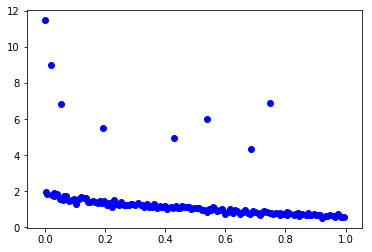

42


In [25]:
'''
experiment
'''
starttime = datetime.datetime.now()


if __name__ == "__main__":

    # multi objective genetic algorithm (NSGA2) is implemented with 'DEAP'
    # Gaussian Process model is implemented with 'gpytorch'
    opt = MultiObjectiveBayesianOpt(
        evaluation_function=zdt1,
        surrogate_model=ExactGPModel,
        optimizer=NSGA2,
        acquisition=acquisition.ei,
        n_objective_dimension=2,
        n_design_variables_dimension=30,
        n_initial_sample=128,#64,128
        n_new_samples=50,
        bayesian_optimization_iter_max=1,
        likelihood_optimization_iter_max=5000,#500,5000,10000
        likelihood_optimization_criteria=1e-6,
        n_ga_population=16,
        n_ga_generation=50,#100
        batch_size=10
    )
    result2 = opt.optimize()

    front2 = np.array(result2[1])
    
    plt.scatter(front2[:, 0], front2[:, 1], c="b")
    plt.axis("tight")
    #print(result)
    #plt.savefig('fig.png')
    #np.savetxt('result_x.csv', result[0].numpy(), delimiter=',')
    #np.savetxt('result_y.csv', result[1].numpy(), delimiter=',')
    plt.show()
    
endtime = datetime.datetime.now()
print ((endtime - starttime).seconds)

Iter 1/5000 - Loss: 1.147  res: 10.46802306
Iter 2/5000 - Loss: 1.092  res: 0.04822062
Iter 3/5000 - Loss: 1.040  res: 0.04726137
Iter 4/5000 - Loss: 0.991  res: 0.04745551
Iter 5/5000 - Loss: 0.942  res: 0.04869361
Iter 6/5000 - Loss: 0.894  res: 0.05076617
Iter 7/5000 - Loss: 0.847  res: 0.05349207
Iter 8/5000 - Loss: 0.799  res: 0.05678144
Iter 9/5000 - Loss: 0.750  res: 0.06069064
Iter 10/5000 - Loss: 0.701  res: 0.06548391
Iter 11/5000 - Loss: 0.651  res: 0.07153632
Iter 12/5000 - Loss: 0.599  res: 0.07904086
Iter 13/5000 - Loss: 0.547  res: 0.08805168
Iter 14/5000 - Loss: 0.493  res: 0.09875063
Iter 15/5000 - Loss: 0.438  res: 0.11156485
Iter 16/5000 - Loss: 0.382  res: 0.12724287
Iter 17/5000 - Loss: 0.326  res: 0.14703261
Iter 18/5000 - Loss: 0.269  res: 0.17307054
Iter 19/5000 - Loss: 0.213  res: 0.20928813
Iter 20/5000 - Loss: 0.157  res: 0.26374956
Iter 21/5000 - Loss: 0.101  res: 0.35598806
Iter 22/5000 - Loss: 0.046  res: 0.54837328
Iter 23/5000 - Loss: -0.009  res: 1.2042

Iter 209/5000 - Loss: -2.925  res: 0.00047911
Iter 210/5000 - Loss: -2.927  res: 0.00047415
Iter 211/5000 - Loss: -2.928  res: 0.00046953
Iter 212/5000 - Loss: -2.930  res: 0.00046459
Iter 213/5000 - Loss: -2.931  res: 0.00046161
Iter 214/5000 - Loss: -2.932  res: 0.00045700
Iter 215/5000 - Loss: -2.934  res: 0.00045321
Iter 216/5000 - Loss: -2.935  res: 0.00044894
Iter 217/5000 - Loss: -2.936  res: 0.00044403
Iter 218/5000 - Loss: -2.938  res: 0.00044140
Iter 219/5000 - Loss: -2.939  res: 0.00043682
Iter 220/5000 - Loss: -2.940  res: 0.00043371
Iter 221/5000 - Loss: -2.941  res: 0.00042947
Iter 222/5000 - Loss: -2.943  res: 0.00042653
Iter 223/5000 - Loss: -2.944  res: 0.00042148
Iter 224/5000 - Loss: -2.945  res: 0.00041920
Iter 225/5000 - Loss: -2.946  res: 0.00041498
Iter 226/5000 - Loss: -2.948  res: 0.00041205
Iter 227/5000 - Loss: -2.949  res: 0.00040832
Iter 228/5000 - Loss: -2.950  res: 0.00040509
Iter 229/5000 - Loss: -2.951  res: 0.00040136
Iter 230/5000 - Loss: -2.952  res:

Iter 399/5000 - Loss: -3.077  res: 0.00015870
Iter 400/5000 - Loss: -3.078  res: 0.00015852
Iter 401/5000 - Loss: -3.078  res: 0.00015663
Iter 402/5000 - Loss: -3.079  res: 0.00015800
Iter 403/5000 - Loss: -3.079  res: 0.00015581
Iter 404/5000 - Loss: -3.080  res: 0.00015563
Iter 405/5000 - Loss: -3.080  res: 0.00015560
Iter 406/5000 - Loss: -3.081  res: 0.00015434
Iter 407/5000 - Loss: -3.081  res: 0.00015308
Iter 408/5000 - Loss: -3.082  res: 0.00015476
Iter 409/5000 - Loss: -3.082  res: 0.00015210
Iter 410/5000 - Loss: -3.083  res: 0.00015208
Iter 411/5000 - Loss: -3.083  res: 0.00015175
Iter 412/5000 - Loss: -3.084  res: 0.00015111
Iter 413/5000 - Loss: -3.084  res: 0.00015031
Iter 414/5000 - Loss: -3.084  res: 0.00015044
Iter 415/5000 - Loss: -3.085  res: 0.00014934
Iter 416/5000 - Loss: -3.085  res: 0.00014854
Iter 417/5000 - Loss: -3.086  res: 0.00014852
Iter 418/5000 - Loss: -3.086  res: 0.00014711
Iter 419/5000 - Loss: -3.087  res: 0.00014770
Iter 420/5000 - Loss: -3.087  res:

Iter 582/5000 - Loss: -3.145  res: 0.00008886
Iter 583/5000 - Loss: -3.145  res: 0.00009052
Iter 584/5000 - Loss: -3.145  res: 0.00008884
Iter 585/5000 - Loss: -3.146  res: 0.00009096
Iter 586/5000 - Loss: -3.146  res: 0.00008959
Iter 587/5000 - Loss: -3.146  res: 0.00008912
Iter 588/5000 - Loss: -3.147  res: 0.00008987
Iter 589/5000 - Loss: -3.147  res: 0.00008820
Iter 590/5000 - Loss: -3.147  res: 0.00008880
Iter 591/5000 - Loss: -3.147  res: 0.00008742
Iter 592/5000 - Loss: -3.148  res: 0.00008833
Iter 593/5000 - Loss: -3.148  res: 0.00008832
Iter 594/5000 - Loss: -3.148  res: 0.00008770
Iter 595/5000 - Loss: -3.149  res: 0.00008830
Iter 596/5000 - Loss: -3.149  res: 0.00008572
Iter 597/5000 - Loss: -3.149  res: 0.00008798
Iter 598/5000 - Loss: -3.149  res: 0.00008631
Iter 599/5000 - Loss: -3.150  res: 0.00008706
Iter 600/5000 - Loss: -3.150  res: 0.00008614
Iter 601/5000 - Loss: -3.150  res: 0.00008735
Iter 602/5000 - Loss: -3.150  res: 0.00008462
Iter 603/5000 - Loss: -3.151  res:

Iter 768/5000 - Loss: -3.188  res: 0.00006117
Iter 769/5000 - Loss: -3.188  res: 0.00005923
Iter 770/5000 - Loss: -3.189  res: 0.00006087
Iter 771/5000 - Loss: -3.189  res: 0.00006071
Iter 772/5000 - Loss: -3.189  res: 0.00006101
Iter 773/5000 - Loss: -3.189  res: 0.00005816
Iter 774/5000 - Loss: -3.189  res: 0.00006130
Iter 775/5000 - Loss: -3.190  res: 0.00005950
Iter 776/5000 - Loss: -3.190  res: 0.00006114
Iter 777/5000 - Loss: -3.190  res: 0.00005770
Iter 778/5000 - Loss: -3.190  res: 0.00006024
Iter 779/5000 - Loss: -3.190  res: 0.00006039
Iter 780/5000 - Loss: -3.191  res: 0.00005949
Iter 781/5000 - Loss: -3.191  res: 0.00005799
Iter 782/5000 - Loss: -3.191  res: 0.00006067
Iter 783/5000 - Loss: -3.191  res: 0.00005903
Iter 784/5000 - Loss: -3.191  res: 0.00005753
Iter 785/5000 - Loss: -3.192  res: 0.00005962
Iter 786/5000 - Loss: -3.192  res: 0.00005961
Iter 787/5000 - Loss: -3.192  res: 0.00005901
Iter 788/5000 - Loss: -3.192  res: 0.00005677
Iter 789/5000 - Loss: -3.192  res:

Iter 947/5000 - Loss: -3.218  res: 0.00004623
Iter 948/5000 - Loss: -3.218  res: 0.00004460
Iter 949/5000 - Loss: -3.219  res: 0.00004400
Iter 950/5000 - Loss: -3.219  res: 0.00004637
Iter 951/5000 - Loss: -3.219  res: 0.00004400
Iter 952/5000 - Loss: -3.219  res: 0.00004429
Iter 953/5000 - Loss: -3.219  res: 0.00004651
Iter 954/5000 - Loss: -3.219  res: 0.00004355
Iter 955/5000 - Loss: -3.219  res: 0.00004429
Iter 956/5000 - Loss: -3.220  res: 0.00004562
Iter 957/5000 - Loss: -3.220  res: 0.00004414
Iter 958/5000 - Loss: -3.220  res: 0.00004517
Iter 959/5000 - Loss: -3.220  res: 0.00004384
Iter 960/5000 - Loss: -3.220  res: 0.00004383
Iter 961/5000 - Loss: -3.220  res: 0.00004487
Iter 962/5000 - Loss: -3.220  res: 0.00004501
Iter 963/5000 - Loss: -3.221  res: 0.00004250
Iter 964/5000 - Loss: -3.221  res: 0.00004620
Iter 965/5000 - Loss: -3.221  res: 0.00004279
Iter 966/5000 - Loss: -3.221  res: 0.00004367
Iter 967/5000 - Loss: -3.221  res: 0.00004530
Iter 968/5000 - Loss: -3.221  res:

Iter 1139/5000 - Loss: -3.243  res: 0.00003603
Iter 1140/5000 - Loss: -3.243  res: 0.00003470
Iter 1141/5000 - Loss: -3.243  res: 0.00003514
Iter 1142/5000 - Loss: -3.243  res: 0.00003440
Iter 1143/5000 - Loss: -3.243  res: 0.00003426
Iter 1144/5000 - Loss: -3.243  res: 0.00003734
Iter 1145/5000 - Loss: -3.244  res: 0.00003352
Iter 1146/5000 - Loss: -3.244  res: 0.00003411
Iter 1147/5000 - Loss: -3.244  res: 0.00003396
Iter 1148/5000 - Loss: -3.244  res: 0.00003690
Iter 1149/5000 - Loss: -3.244  res: 0.00003454
Iter 1150/5000 - Loss: -3.244  res: 0.00003322
Iter 1151/5000 - Loss: -3.244  res: 0.00003542
Iter 1152/5000 - Loss: -3.244  res: 0.00003278
Iter 1153/5000 - Loss: -3.244  res: 0.00003601
Iter 1154/5000 - Loss: -3.245  res: 0.00003468
Iter 1155/5000 - Loss: -3.245  res: 0.00003395
Iter 1156/5000 - Loss: -3.245  res: 0.00003409
Iter 1157/5000 - Loss: -3.245  res: 0.00003380
Iter 1158/5000 - Loss: -3.245  res: 0.00003556
Iter 1159/5000 - Loss: -3.245  res: 0.00003394
Iter 1160/500

Iter 1315/5000 - Loss: -3.261  res: 0.00002837
Iter 1316/5000 - Loss: -3.261  res: 0.00002793
Iter 1317/5000 - Loss: -3.261  res: 0.00003114
Iter 1318/5000 - Loss: -3.261  res: 0.00002851
Iter 1319/5000 - Loss: -3.261  res: 0.00002866
Iter 1320/5000 - Loss: -3.262  res: 0.00002836
Iter 1321/5000 - Loss: -3.262  res: 0.00002792
Iter 1322/5000 - Loss: -3.262  res: 0.00003070
Iter 1323/5000 - Loss: -3.262  res: 0.00002851
Iter 1324/5000 - Loss: -3.262  res: 0.00002821
Iter 1325/5000 - Loss: -3.262  res: 0.00002807
Iter 1326/5000 - Loss: -3.262  res: 0.00002777
Iter 1327/5000 - Loss: -3.262  res: 0.00002850
Iter 1328/5000 - Loss: -3.262  res: 0.00002996
Iter 1329/5000 - Loss: -3.262  res: 0.00002894
Iter 1330/5000 - Loss: -3.263  res: 0.00002806
Iter 1331/5000 - Loss: -3.263  res: 0.00002821
Iter 1332/5000 - Loss: -3.263  res: 0.00002821
Iter 1333/5000 - Loss: -3.263  res: 0.00003040
Iter 1334/5000 - Loss: -3.263  res: 0.00002806
Iter 1335/5000 - Loss: -3.263  res: 0.00002806
Iter 1336/500

Iter 1498/5000 - Loss: -3.277  res: 0.00002328
Iter 1499/5000 - Loss: -3.277  res: 0.00002459
Iter 1500/5000 - Loss: -3.277  res: 0.00002328
Iter 1501/5000 - Loss: -3.277  res: 0.00002488
Iter 1502/5000 - Loss: -3.277  res: 0.00002284
Iter 1503/5000 - Loss: -3.277  res: 0.00002430
Iter 1504/5000 - Loss: -3.277  res: 0.00002546
Iter 1505/5000 - Loss: -3.278  res: 0.00002415
Iter 1506/5000 - Loss: -3.278  res: 0.00002371
Iter 1507/5000 - Loss: -3.278  res: 0.00002473
Iter 1508/5000 - Loss: -3.278  res: 0.00002342
Iter 1509/5000 - Loss: -3.278  res: 0.00002400
Iter 1510/5000 - Loss: -3.278  res: 0.00002313
Iter 1511/5000 - Loss: -3.278  res: 0.00002458
Iter 1512/5000 - Loss: -3.278  res: 0.00002400
Iter 1513/5000 - Loss: -3.278  res: 0.00002357
Iter 1514/5000 - Loss: -3.278  res: 0.00002400
Iter 1515/5000 - Loss: -3.278  res: 0.00002284
Iter 1516/5000 - Loss: -3.278  res: 0.00002647
Iter 1517/5000 - Loss: -3.278  res: 0.00002327
Iter 1518/5000 - Loss: -3.279  res: 0.00002371
Iter 1519/500

Iter 1684/5000 - Loss: -3.291  res: 0.00002087
Iter 1685/5000 - Loss: -3.291  res: 0.00002087
Iter 1686/5000 - Loss: -3.291  res: 0.00002058
Iter 1687/5000 - Loss: -3.291  res: 0.00001985
Iter 1688/5000 - Loss: -3.291  res: 0.00002072
Iter 1689/5000 - Loss: -3.291  res: 0.00002043
Iter 1690/5000 - Loss: -3.291  res: 0.00002115
Iter 1691/5000 - Loss: -3.291  res: 0.00002188
Iter 1692/5000 - Loss: -3.291  res: 0.00002086
Iter 1693/5000 - Loss: -3.291  res: 0.00002057
Iter 1694/5000 - Loss: -3.291  res: 0.00001985
Iter 1695/5000 - Loss: -3.291  res: 0.00002130
Iter 1696/5000 - Loss: -3.291  res: 0.00002072
Iter 1697/5000 - Loss: -3.292  res: 0.00002057
Iter 1698/5000 - Loss: -3.292  res: 0.00001999
Iter 1699/5000 - Loss: -3.292  res: 0.00002057
Iter 1700/5000 - Loss: -3.292  res: 0.00001970
Iter 1701/5000 - Loss: -3.292  res: 0.00002086
Iter 1702/5000 - Loss: -3.292  res: 0.00002071
Iter 1703/5000 - Loss: -3.292  res: 0.00001999
Iter 1704/5000 - Loss: -3.292  res: 0.00002231
Iter 1705/500

Iter 1873/5000 - Loss: -3.303  res: 0.00001718
Iter 1874/5000 - Loss: -3.303  res: 0.00001776
Iter 1875/5000 - Loss: -3.303  res: 0.00001776
Iter 1876/5000 - Loss: -3.303  res: 0.00001805
Iter 1877/5000 - Loss: -3.303  res: 0.00001819
Iter 1878/5000 - Loss: -3.303  res: 0.00001805
Iter 1879/5000 - Loss: -3.303  res: 0.00001978
Iter 1880/5000 - Loss: -3.303  res: 0.00001992
Iter 1881/5000 - Loss: -3.303  res: 0.00001646
Iter 1882/5000 - Loss: -3.303  res: 0.00001819
Iter 1883/5000 - Loss: -3.303  res: 0.00001848
Iter 1884/5000 - Loss: -3.303  res: 0.00001761
Iter 1885/5000 - Loss: -3.303  res: 0.00001718
Iter 1886/5000 - Loss: -3.304  res: 0.00001804
Iter 1887/5000 - Loss: -3.304  res: 0.00001848
Iter 1888/5000 - Loss: -3.304  res: 0.00001761
Iter 1889/5000 - Loss: -3.304  res: 0.00001847
Iter 1890/5000 - Loss: -3.304  res: 0.00001718
Iter 1891/5000 - Loss: -3.304  res: 0.00001718
Iter 1892/5000 - Loss: -3.304  res: 0.00001819
Iter 1893/5000 - Loss: -3.304  res: 0.00002035
Iter 1894/500

Iter 2057/5000 - Loss: -3.313  res: 0.00001670
Iter 2058/5000 - Loss: -3.313  res: 0.00001641
Iter 2059/5000 - Loss: -3.313  res: 0.00001655
Iter 2060/5000 - Loss: -3.313  res: 0.00001612
Iter 2061/5000 - Loss: -3.313  res: 0.00001525
Iter 2062/5000 - Loss: -3.313  res: 0.00001626
Iter 2063/5000 - Loss: -3.313  res: 0.00001626
Iter 2064/5000 - Loss: -3.314  res: 0.00001497
Iter 2065/5000 - Loss: -3.314  res: 0.00002159
Iter 2066/5000 - Loss: -3.314  res: 0.00001525
Iter 2067/5000 - Loss: -3.314  res: 0.00001569
Iter 2068/5000 - Loss: -3.314  res: 0.00001583
Iter 2069/5000 - Loss: -3.314  res: 0.00001554
Iter 2070/5000 - Loss: -3.314  res: 0.00001554
Iter 2071/5000 - Loss: -3.314  res: 0.00001597
Iter 2072/5000 - Loss: -3.314  res: 0.00001525
Iter 2073/5000 - Loss: -3.314  res: 0.00001511
Iter 2074/5000 - Loss: -3.314  res: 0.00001799
Iter 2075/5000 - Loss: -3.314  res: 0.00001496
Iter 2076/5000 - Loss: -3.314  res: 0.00001597
Iter 2077/5000 - Loss: -3.314  res: 0.00001554
Iter 2078/500

Iter 2244/5000 - Loss: -3.323  res: 0.00001392
Iter 2245/5000 - Loss: -3.323  res: 0.00001464
Iter 2246/5000 - Loss: -3.323  res: 0.00001349
Iter 2247/5000 - Loss: -3.323  res: 0.00001435
Iter 2248/5000 - Loss: -3.323  res: 0.00001507
Iter 2249/5000 - Loss: -3.323  res: 0.00001435
Iter 2250/5000 - Loss: -3.323  res: 0.00001464
Iter 2251/5000 - Loss: -3.323  res: 0.00001406
Iter 2252/5000 - Loss: -3.323  res: 0.00001148
Iter 2253/5000 - Loss: -3.323  res: 0.00001564
Iter 2254/5000 - Loss: -3.323  res: 0.00001449
Iter 2255/5000 - Loss: -3.323  res: 0.00001406
Iter 2256/5000 - Loss: -3.323  res: 0.00001621
Iter 2257/5000 - Loss: -3.323  res: 0.00001349
Iter 2258/5000 - Loss: -3.323  res: 0.00001464
Iter 2259/5000 - Loss: -3.323  res: 0.00001406
Iter 2260/5000 - Loss: -3.323  res: 0.00001334
Iter 2261/5000 - Loss: -3.323  res: 0.00001377
Iter 2262/5000 - Loss: -3.324  res: 0.00001406
Iter 2263/5000 - Loss: -3.324  res: 0.00001435
Iter 2264/5000 - Loss: -3.324  res: 0.00001392
Iter 2265/500

Iter 2422/5000 - Loss: -3.331  res: 0.00001360
Iter 2423/5000 - Loss: -3.331  res: 0.00001303
Iter 2424/5000 - Loss: -3.331  res: 0.00001245
Iter 2425/5000 - Loss: -3.331  res: 0.00001432
Iter 2426/5000 - Loss: -3.331  res: 0.00001145
Iter 2427/5000 - Loss: -3.331  res: 0.00001460
Iter 2428/5000 - Loss: -3.331  res: 0.00001260
Iter 2429/5000 - Loss: -3.331  res: 0.00001274
Iter 2430/5000 - Loss: -3.331  res: 0.00001303
Iter 2431/5000 - Loss: -3.331  res: 0.00001188
Iter 2432/5000 - Loss: -3.331  res: 0.00001489
Iter 2433/5000 - Loss: -3.331  res: 0.00001260
Iter 2434/5000 - Loss: -3.331  res: 0.00001346
Iter 2435/5000 - Loss: -3.331  res: 0.00001217
Iter 2436/5000 - Loss: -3.331  res: 0.00001288
Iter 2437/5000 - Loss: -3.331  res: 0.00001388
Iter 2438/5000 - Loss: -3.331  res: 0.00001431
Iter 2439/5000 - Loss: -3.332  res: 0.00001059
Iter 2440/5000 - Loss: -3.332  res: 0.00001489
Iter 2441/5000 - Loss: -3.332  res: 0.00001217
Iter 2442/5000 - Loss: -3.332  res: 0.00001317
Iter 2443/500

Iter 2607/5000 - Loss: -3.338  res: 0.00001228
Iter 2608/5000 - Loss: -3.339  res: 0.00001171
Iter 2609/5000 - Loss: -3.339  res: 0.00001114
Iter 2610/5000 - Loss: -3.339  res: 0.00001228
Iter 2611/5000 - Loss: -3.339  res: 0.00001171
Iter 2612/5000 - Loss: -3.339  res: 0.00001200
Iter 2613/5000 - Loss: -3.339  res: 0.00001214
Iter 2614/5000 - Loss: -3.339  res: 0.00001143
Iter 2615/5000 - Loss: -3.339  res: 0.00001200
Iter 2616/5000 - Loss: -3.339  res: 0.00001085
Iter 2617/5000 - Loss: -3.339  res: 0.00001100
Iter 2618/5000 - Loss: -3.339  res: 0.00001285
Iter 2619/5000 - Loss: -3.339  res: 0.00001328
Iter 2620/5000 - Loss: -3.339  res: 0.00001114
Iter 2621/5000 - Loss: -3.339  res: 0.00001157
Iter 2622/5000 - Loss: -3.339  res: 0.00001114
Iter 2623/5000 - Loss: -3.339  res: 0.00001271
Iter 2624/5000 - Loss: -3.339  res: 0.00001214
Iter 2625/5000 - Loss: -3.339  res: 0.00001214
Iter 2626/5000 - Loss: -3.339  res: 0.00001142
Iter 2627/5000 - Loss: -3.339  res: 0.00001100
Iter 2628/500

Iter 2789/5000 - Loss: -3.345  res: 0.00001083
Iter 2790/5000 - Loss: -3.345  res: 0.00001212
Iter 2791/5000 - Loss: -3.346  res: 0.00001183
Iter 2792/5000 - Loss: -3.346  res: 0.00001140
Iter 2793/5000 - Loss: -3.346  res: 0.00000955
Iter 2794/5000 - Loss: -3.346  res: 0.00001140
Iter 2795/5000 - Loss: -3.346  res: 0.00001226
Iter 2796/5000 - Loss: -3.346  res: 0.00000955
Iter 2797/5000 - Loss: -3.346  res: 0.00001183
Iter 2798/5000 - Loss: -3.346  res: 0.00000998
Iter 2799/5000 - Loss: -3.346  res: 0.00001026
Iter 2800/5000 - Loss: -3.346  res: 0.00001183
Iter 2801/5000 - Loss: -3.346  res: 0.00001240
Iter 2802/5000 - Loss: -3.346  res: 0.00001069
Iter 2803/5000 - Loss: -3.346  res: 0.00001040
Iter 2804/5000 - Loss: -3.346  res: 0.00001083
Iter 2805/5000 - Loss: -3.346  res: 0.00000983
Iter 2806/5000 - Loss: -3.346  res: 0.00001140
Iter 2807/5000 - Loss: -3.346  res: 0.00001040
Iter 2808/5000 - Loss: -3.346  res: 0.00001197
Iter 2809/5000 - Loss: -3.346  res: 0.00001097
Iter 2810/500

Iter 2971/5000 - Loss: -3.352  res: 0.00001024
Iter 2972/5000 - Loss: -3.352  res: 0.00000996
Iter 2973/5000 - Loss: -3.352  res: 0.00001053
Iter 2974/5000 - Loss: -3.352  res: 0.00001110
Iter 2975/5000 - Loss: -3.352  res: 0.00000953
Iter 2976/5000 - Loss: -3.352  res: 0.00000910
Iter 2977/5000 - Loss: -3.352  res: 0.00001124
Iter 2978/5000 - Loss: -3.352  res: 0.00000953
Iter 2979/5000 - Loss: -3.352  res: 0.00001038
Iter 2980/5000 - Loss: -3.352  res: 0.00001038
Iter 2981/5000 - Loss: -3.352  res: 0.00000996
Iter 2982/5000 - Loss: -3.352  res: 0.00000996
Iter 2983/5000 - Loss: -3.352  res: 0.00000996
Iter 2984/5000 - Loss: -3.352  res: 0.00000953
Iter 2985/5000 - Loss: -3.352  res: 0.00001053
Iter 2986/5000 - Loss: -3.352  res: 0.00001038
Iter 2987/5000 - Loss: -3.352  res: 0.00000953
Iter 2988/5000 - Loss: -3.352  res: 0.00001067
Iter 2989/5000 - Loss: -3.353  res: 0.00001081
Iter 2990/5000 - Loss: -3.353  res: 0.00000896
Iter 2991/5000 - Loss: -3.353  res: 0.00001067
Iter 2992/500

Iter 3164/5000 - Loss: -3.358  res: 0.00000838
Iter 3165/5000 - Loss: -3.358  res: 0.00001008
Iter 3166/5000 - Loss: -3.358  res: 0.00000980
Iter 3167/5000 - Loss: -3.358  res: 0.00000994
Iter 3168/5000 - Loss: -3.358  res: 0.00000824
Iter 3169/5000 - Loss: -3.358  res: 0.00001022
Iter 3170/5000 - Loss: -3.358  res: 0.00000795
Iter 3171/5000 - Loss: -3.358  res: 0.00001008
Iter 3172/5000 - Loss: -3.359  res: 0.00000994
Iter 3173/5000 - Loss: -3.359  res: 0.00000823
Iter 3174/5000 - Loss: -3.359  res: 0.00001036
Iter 3175/5000 - Loss: -3.359  res: 0.00000951
Iter 3176/5000 - Loss: -3.359  res: 0.00001022
Iter 3177/5000 - Loss: -3.359  res: 0.00000781
Iter 3178/5000 - Loss: -3.359  res: 0.00001022
Iter 3179/5000 - Loss: -3.359  res: 0.00001122
Iter 3180/5000 - Loss: -3.359  res: 0.00000667
Iter 3181/5000 - Loss: -3.359  res: 0.00000994
Iter 3182/5000 - Loss: -3.359  res: 0.00001008
Iter 3183/5000 - Loss: -3.359  res: 0.00000909
Iter 3184/5000 - Loss: -3.359  res: 0.00001008
Iter 3185/500

Iter 3368/5000 - Loss: -3.365  res: 0.00000964
Iter 3369/5000 - Loss: -3.365  res: 0.00000879
Iter 3370/5000 - Loss: -3.365  res: 0.00000694
Iter 3371/5000 - Loss: -3.365  res: 0.00001091
Iter 3372/5000 - Loss: -3.365  res: 0.00000836
Iter 3373/5000 - Loss: -3.365  res: 0.00000921
Iter 3374/5000 - Loss: -3.365  res: 0.00000864
Iter 3375/5000 - Loss: -3.365  res: 0.00000723
Iter 3376/5000 - Loss: -3.365  res: 0.00000935
Iter 3377/5000 - Loss: -3.365  res: 0.00000893
Iter 3378/5000 - Loss: -3.365  res: 0.00000921
Iter 3379/5000 - Loss: -3.365  res: 0.00000893
Iter 3380/5000 - Loss: -3.365  res: 0.00000921
Iter 3381/5000 - Loss: -3.365  res: 0.00000737
Iter 3382/5000 - Loss: -3.365  res: 0.00000949
Iter 3383/5000 - Loss: -3.365  res: 0.00000850
Iter 3384/5000 - Loss: -3.365  res: 0.00000850
Iter 3385/5000 - Loss: -3.365  res: 0.00000879
Iter 3386/5000 - Loss: -3.365  res: 0.00000765
Iter 3387/5000 - Loss: -3.365  res: 0.00001049
Iter 3388/5000 - Loss: -3.365  res: 0.00000978
Iter 3389/500

Iter 3549/5000 - Loss: -3.370  res: 0.00000665
Iter 3550/5000 - Loss: -3.370  res: 0.00000920
Iter 3551/5000 - Loss: -3.370  res: 0.00000906
Iter 3552/5000 - Loss: -3.370  res: 0.00000764
Iter 3553/5000 - Loss: -3.370  res: 0.00000778
Iter 3554/5000 - Loss: -3.370  res: 0.00000792
Iter 3555/5000 - Loss: -3.370  res: 0.00000891
Iter 3556/5000 - Loss: -3.370  res: 0.00000693
Iter 3557/5000 - Loss: -3.370  res: 0.00000877
Iter 3558/5000 - Loss: -3.370  res: 0.00000750
Iter 3559/5000 - Loss: -3.370  res: 0.00000962
Iter 3560/5000 - Loss: -3.370  res: 0.00000807
Iter 3561/5000 - Loss: -3.370  res: 0.00000821
Iter 3562/5000 - Loss: -3.370  res: 0.00000651
Iter 3563/5000 - Loss: -3.370  res: 0.00000920
Iter 3564/5000 - Loss: -3.370  res: 0.00000821
Iter 3565/5000 - Loss: -3.370  res: 0.00000877
Iter 3566/5000 - Loss: -3.370  res: 0.00000792
Iter 3567/5000 - Loss: -3.370  res: 0.00000863
Iter 3568/5000 - Loss: -3.370  res: 0.00000750
Iter 3569/5000 - Loss: -3.370  res: 0.00000821
Iter 3570/500

Iter 3730/5000 - Loss: -3.375  res: 0.00000918
Iter 3731/5000 - Loss: -3.375  res: 0.00000650
Iter 3732/5000 - Loss: -3.375  res: 0.00000678
Iter 3733/5000 - Loss: -3.375  res: 0.00000876
Iter 3734/5000 - Loss: -3.375  res: 0.00000608
Iter 3735/5000 - Loss: -3.375  res: 0.00000975
Iter 3736/5000 - Loss: -3.375  res: 0.00000650
Iter 3737/5000 - Loss: -3.375  res: 0.00000933
Iter 3738/5000 - Loss: -3.375  res: 0.00000608
Iter 3739/5000 - Loss: -3.375  res: 0.00000933
Iter 3740/5000 - Loss: -3.375  res: 0.00000650
Iter 3741/5000 - Loss: -3.375  res: 0.00000904
Iter 3742/5000 - Loss: -3.375  res: 0.00000735
Iter 3743/5000 - Loss: -3.375  res: 0.00000904
Iter 3744/5000 - Loss: -3.375  res: 0.00000678
Iter 3745/5000 - Loss: -3.375  res: 0.00000890
Iter 3746/5000 - Loss: -3.375  res: 0.00000692
Iter 3747/5000 - Loss: -3.375  res: 0.00000904
Iter 3748/5000 - Loss: -3.375  res: 0.00000636
Iter 3749/5000 - Loss: -3.375  res: 0.00000763
Iter 3750/5000 - Loss: -3.375  res: 0.00000918
Iter 3751/500

Iter 3910/5000 - Loss: -3.379  res: 0.00000550
Iter 3911/5000 - Loss: -3.379  res: 0.00000833
Iter 3912/5000 - Loss: -3.379  res: 0.00000776
Iter 3913/5000 - Loss: -3.379  res: 0.00000818
Iter 3914/5000 - Loss: -3.379  res: 0.00000635
Iter 3915/5000 - Loss: -3.379  res: 0.00000706
Iter 3916/5000 - Loss: -3.379  res: 0.00000706
Iter 3917/5000 - Loss: -3.379  res: 0.00000847
Iter 3918/5000 - Loss: -3.379  res: 0.00000593
Iter 3919/5000 - Loss: -3.380  res: 0.00000748
Iter 3920/5000 - Loss: -3.380  res: 0.00000974
Iter 3921/5000 - Loss: -3.380  res: 0.00000720
Iter 3922/5000 - Loss: -3.380  res: 0.00000607
Iter 3923/5000 - Loss: -3.380  res: 0.00000762
Iter 3924/5000 - Loss: -3.380  res: 0.00000748
Iter 3925/5000 - Loss: -3.380  res: 0.00000776
Iter 3926/5000 - Loss: -3.380  res: 0.00000705
Iter 3927/5000 - Loss: -3.380  res: 0.00000663
Iter 3928/5000 - Loss: -3.380  res: 0.00000649
Iter 3929/5000 - Loss: -3.380  res: 0.00000945
Iter 3930/5000 - Loss: -3.380  res: 0.00000818
Iter 3931/500

Iter 4094/5000 - Loss: -3.384  res: 0.00000691
Iter 4095/5000 - Loss: -3.384  res: 0.00000831
Iter 4096/5000 - Loss: -3.384  res: 0.00000690
Iter 4097/5000 - Loss: -3.384  res: 0.00000676
Iter 4098/5000 - Loss: -3.384  res: 0.00000676
Iter 4099/5000 - Loss: -3.384  res: 0.00000690
Iter 4100/5000 - Loss: -3.384  res: 0.00000648
Iter 4101/5000 - Loss: -3.384  res: 0.00000634
Iter 4102/5000 - Loss: -3.384  res: 0.00000803
Iter 4103/5000 - Loss: -3.384  res: 0.00000676
Iter 4104/5000 - Loss: -3.384  res: 0.00000690
Iter 4105/5000 - Loss: -3.384  res: 0.00000747
Iter 4106/5000 - Loss: -3.384  res: 0.00000733
Iter 4107/5000 - Loss: -3.384  res: 0.00000803
Iter 4108/5000 - Loss: -3.384  res: 0.00000662
Iter 4109/5000 - Loss: -3.384  res: 0.00000620
Iter 4110/5000 - Loss: -3.384  res: 0.00000747
Iter 4111/5000 - Loss: -3.384  res: 0.00000634
Iter 4112/5000 - Loss: -3.384  res: 0.00000719
Iter 4113/5000 - Loss: -3.384  res: 0.00000550
Iter 4114/5000 - Loss: -3.384  res: 0.00000775
Iter 4115/500

Iter 4281/5000 - Loss: -3.388  res: 0.00000760
Iter 4282/5000 - Loss: -3.388  res: 0.00000563
Iter 4283/5000 - Loss: -3.388  res: 0.00000844
Iter 4284/5000 - Loss: -3.388  res: 0.00000535
Iter 4285/5000 - Loss: -3.388  res: 0.00000760
Iter 4286/5000 - Loss: -3.388  res: 0.00000633
Iter 4287/5000 - Loss: -3.388  res: 0.00000690
Iter 4288/5000 - Loss: -3.388  res: 0.00000676
Iter 4289/5000 - Loss: -3.388  res: 0.00000788
Iter 4290/5000 - Loss: -3.388  res: 0.00000605
Iter 4291/5000 - Loss: -3.388  res: 0.00000633
Iter 4292/5000 - Loss: -3.388  res: 0.00000619
Iter 4293/5000 - Loss: -3.388  res: 0.00000563
Iter 4294/5000 - Loss: -3.388  res: 0.00000887
Iter 4295/5000 - Loss: -3.388  res: 0.00000521
Iter 4296/5000 - Loss: -3.389  res: 0.00000802
Iter 4297/5000 - Loss: -3.389  res: 0.00000577
Iter 4298/5000 - Loss: -3.389  res: 0.00000816
Iter 4299/5000 - Loss: -3.389  res: 0.00000591
Iter 4300/5000 - Loss: -3.389  res: 0.00000718
Iter 4301/5000 - Loss: -3.389  res: 0.00000549
Iter 4302/500

Iter 4460/5000 - Loss: -3.392  res: 0.00000745
Iter 4461/5000 - Loss: -3.392  res: 0.00000478
Iter 4462/5000 - Loss: -3.392  res: 0.00000759
Iter 4463/5000 - Loss: -3.392  res: 0.00000604
Iter 4464/5000 - Loss: -3.392  res: 0.00000590
Iter 4465/5000 - Loss: -3.392  res: 0.00000562
Iter 4466/5000 - Loss: -3.392  res: 0.00000815
Iter 4467/5000 - Loss: -3.392  res: 0.00000422
Iter 4468/5000 - Loss: -3.392  res: 0.00000857
Iter 4469/5000 - Loss: -3.392  res: 0.00000618
Iter 4470/5000 - Loss: -3.392  res: 0.00000562
Iter 4471/5000 - Loss: -3.392  res: 0.00000661
Iter 4472/5000 - Loss: -3.392  res: 0.00000548
Iter 4473/5000 - Loss: -3.392  res: 0.00000661
Iter 4474/5000 - Loss: -3.392  res: 0.00000576
Iter 4475/5000 - Loss: -3.392  res: 0.00000675
Iter 4476/5000 - Loss: -3.392  res: 0.00000633
Iter 4477/5000 - Loss: -3.393  res: 0.00000745
Iter 4478/5000 - Loss: -3.393  res: 0.00000647
Iter 4479/5000 - Loss: -3.393  res: 0.00000604
Iter 4480/5000 - Loss: -3.393  res: 0.00000787
Iter 4481/500

Iter 4644/5000 - Loss: -3.396  res: 0.00000800
Iter 4645/5000 - Loss: -3.396  res: 0.00000379
Iter 4646/5000 - Loss: -3.396  res: 0.00000786
Iter 4647/5000 - Loss: -3.396  res: 0.00000435
Iter 4648/5000 - Loss: -3.396  res: 0.00000758
Iter 4649/5000 - Loss: -3.396  res: 0.00000688
Iter 4650/5000 - Loss: -3.396  res: 0.00000519
Iter 4651/5000 - Loss: -3.396  res: 0.00000421
Iter 4652/5000 - Loss: -3.396  res: 0.00000744
Iter 4653/5000 - Loss: -3.396  res: 0.00000604
Iter 4654/5000 - Loss: -3.396  res: 0.00000618
Iter 4655/5000 - Loss: -3.396  res: 0.00000590
Iter 4656/5000 - Loss: -3.396  res: 0.00000632
Iter 4657/5000 - Loss: -3.396  res: 0.00000674
Iter 4658/5000 - Loss: -3.396  res: 0.00000618
Iter 4659/5000 - Loss: -3.396  res: 0.00000646
Iter 4660/5000 - Loss: -3.396  res: 0.00000562
Iter 4661/5000 - Loss: -3.396  res: 0.00000618
Iter 4662/5000 - Loss: -3.396  res: 0.00000477
Iter 4663/5000 - Loss: -3.396  res: 0.00000562
Iter 4664/5000 - Loss: -3.396  res: 0.00000758
Iter 4665/500

Iter 138/5000 - Loss: -1.667  res: 0.00163576
Iter 139/5000 - Loss: -1.669  res: 0.00160634
Iter 140/5000 - Loss: -1.672  res: 0.00158377
Iter 141/5000 - Loss: -1.675  res: 0.00155303
Iter 142/5000 - Loss: -1.677  res: 0.00153325
Iter 143/5000 - Loss: -1.680  res: 0.00150702
Iter 144/5000 - Loss: -1.682  res: 0.00148048
Iter 145/5000 - Loss: -1.685  res: 0.00145958
Iter 146/5000 - Loss: -1.687  res: 0.00143679
Iter 147/5000 - Loss: -1.689  res: 0.00141240
Iter 148/5000 - Loss: -1.692  res: 0.00139305
Iter 149/5000 - Loss: -1.694  res: 0.00137519
Iter 150/5000 - Loss: -1.696  res: 0.00135022
Iter 151/5000 - Loss: -1.699  res: 0.00133336
Iter 152/5000 - Loss: -1.701  res: 0.00131095
Iter 153/5000 - Loss: -1.703  res: 0.00129662
Iter 154/5000 - Loss: -1.705  res: 0.00127562
Iter 155/5000 - Loss: -1.707  res: 0.00125638
Iter 156/5000 - Loss: -1.709  res: 0.00123916
Iter 157/5000 - Loss: -1.712  res: 0.00122536
Iter 158/5000 - Loss: -1.714  res: 0.00120101
Iter 159/5000 - Loss: -1.716  res:

Iter 347/5000 - Loss: -1.902  res: 0.00026273
Iter 348/5000 - Loss: -1.902  res: 0.00027997
Iter 349/5000 - Loss: -1.903  res: 0.00027324
Iter 350/5000 - Loss: -1.903  res: 0.00026878
Iter 351/5000 - Loss: -1.904  res: 0.00026308
Iter 352/5000 - Loss: -1.904  res: 0.00028893
Iter 353/5000 - Loss: -1.905  res: 0.00025241
Iter 354/5000 - Loss: -1.905  res: 0.00026274
Iter 355/5000 - Loss: -1.906  res: 0.00026342
Iter 356/5000 - Loss: -1.906  res: 0.00026348
Iter 357/5000 - Loss: -1.907  res: 0.00027291
Iter 358/5000 - Loss: -1.907  res: 0.00024795
Iter 359/5000 - Loss: -1.908  res: 0.00027177
Iter 360/5000 - Loss: -1.908  res: 0.00024158
Iter 361/5000 - Loss: -1.909  res: 0.00025089
Iter 362/5000 - Loss: -1.909  res: 0.00026632
Iter 363/5000 - Loss: -1.910  res: 0.00025426
Iter 364/5000 - Loss: -1.910  res: 0.00026031
Iter 365/5000 - Loss: -1.911  res: 0.00024177
Iter 366/5000 - Loss: -1.911  res: 0.00025731
Iter 367/5000 - Loss: -1.912  res: 0.00023167
Iter 368/5000 - Loss: -1.912  res:

Iter 532/5000 - Loss: -1.970  res: 0.00013251
Iter 533/5000 - Loss: -1.971  res: 0.00011761
Iter 534/5000 - Loss: -1.971  res: 0.00018172
Iter 535/5000 - Loss: -1.971  res: 0.00013282
Iter 536/5000 - Loss: -1.971  res: 0.00012071
Iter 537/5000 - Loss: -1.972  res: 0.00012021
Iter 538/5000 - Loss: -1.972  res: 0.00012418
Iter 539/5000 - Loss: -1.972  res: 0.00015149
Iter 540/5000 - Loss: -1.973  res: 0.00013515
Iter 541/5000 - Loss: -1.973  res: 0.00014794
Iter 542/5000 - Loss: -1.973  res: 0.00011336
Iter 543/5000 - Loss: -1.973  res: 0.00016241
Iter 544/5000 - Loss: -1.974  res: 0.00011164
Iter 545/5000 - Loss: -1.974  res: 0.00014956
Iter 546/5000 - Loss: -1.974  res: 0.00010291
Iter 547/5000 - Loss: -1.974  res: 0.00015846
Iter 548/5000 - Loss: -1.975  res: 0.00010771
Iter 549/5000 - Loss: -1.975  res: 0.00015189
Iter 550/5000 - Loss: -1.975  res: 0.00011903
Iter 551/5000 - Loss: -1.975  res: 0.00011238
Iter 552/5000 - Loss: -1.976  res: 0.00015485
Iter 553/5000 - Loss: -1.976  res:

Iter 712/5000 - Loss: -2.010  res: 0.00006051
Iter 713/5000 - Loss: -2.010  res: 0.00012551
Iter 714/5000 - Loss: -2.010  res: 0.00003558
Iter 715/5000 - Loss: -2.010  res: 0.00011505
Iter 716/5000 - Loss: -2.010  res: 0.00004317
Iter 717/5000 - Loss: -2.011  res: 0.00011195
Iter 718/5000 - Loss: -2.011  res: 0.00008419
Iter 719/5000 - Loss: -2.011  res: 0.00006000
Iter 720/5000 - Loss: -2.011  res: 0.00012212
Iter 721/5000 - Loss: -2.011  res: 0.00007113
Iter 722/5000 - Loss: -2.012  res: 0.00012755
Iter 723/5000 - Loss: -2.012  res: 0.00007017
Iter 724/5000 - Loss: -2.012  res: 0.00010050
Iter 725/5000 - Loss: -2.012  res: 0.00004361
Iter 726/5000 - Loss: -2.012  res: 0.00011163
Iter 727/5000 - Loss: -2.012  res: 0.00008839
Iter 728/5000 - Loss: -2.012  res: 0.00003080
Iter 729/5000 - Loss: -2.013  res: 0.00016752
Iter 730/5000 - Loss: -2.013  res: 0.00006231
Iter 731/5000 - Loss: -2.013  res: 0.00010660
Iter 732/5000 - Loss: -2.013  res: 0.00006869
Iter 733/5000 - Loss: -2.013  res:

2  	16   	[0.32615713 0.44151256]	[0.00782281 0.00800285]	[0.45558623 0.57971433]	[0.94460809 1.43380272]
3  	16   	[0.33347481 0.44780526]	[0.00782281 0.00273286]	[0.53078267 0.4954079 ]	[0.96392286 1.43380272]
4  	16   	[0.30764082 0.33682535]	[0.00716698 0.00273286]	[0.5544442  0.40831133]	[0.96392286 1.19369233]
5  	16   	[0.28845475 0.33064081]	[0.00716698 0.00273286]	[0.47958909 0.45577483]	[0.96392286 1.19369233]
6  	16   	[0.31883777 0.37608184]	[0.00716698 0.00273286]	[0.42682369 0.51149903]	[0.96392286 1.19369233]
7  	16   	[0.31248333 0.36689957]	[0.00716698 0.00273286]	[0.44167828 0.47454554]	[0.96392286 1.19369233]
8  	16   	[0.3372005  0.33692086]	[7.15448903e-03 9.31560609e-05]	[0.51080517 0.37509968]	[0.96402943 1.15637696]
9  	16   	[0.33619751 0.37600759]	[7.15448903e-03 9.31560609e-05]	[0.42346669 0.45763746]	[0.96402943 1.15637696]
10 	16   	[0.33248078 0.38453433]	[7.15448903e-03 9.10376314e-07]	[0.456875   0.40068023]	[0.96380854 1.15637696]
11 	16   	[0.29189631 

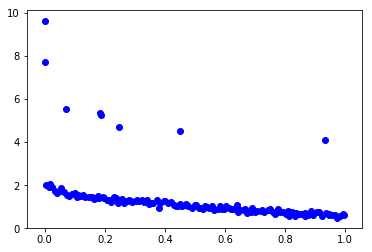

39


In [457]:

starttime = datetime.datetime.now()


if __name__ == "__main__":

    # multi objective genetic algorithm (NSGA2) is implemented with 'DEAP'
    # Gaussian Process model is implemented with 'gpytorch'
    opt = MultiObjectiveBayesianOpt(
        evaluation_function=zdt1,
        surrogate_model=ExactGPModel,
        optimizer=NSGA3,
        acquisition=acquisition.ei,
        n_objective_dimension=2,
        n_design_variables_dimension=30,
        n_initial_sample=128,#64,128
        n_new_samples=8,
        bayesian_optimization_iter_max=8,#100 #250
        likelihood_optimization_iter_max=5000,#500,5000,10000
        likelihood_optimization_criteria=1e-6,
        n_ga_population=16,
        n_ga_generation=50,#100
    )
    result3 = opt.optimize()

    front3 = np.array(result3[1])
    
    plt.scatter(front3[:, 0], front3[:, 1], c="b")
    plt.axis("tight")
    #print(result)
    #plt.savefig('fig.png')
    #np.savetxt('result_x.csv', result[0].numpy(), delimiter=',')
    #np.savetxt('result_y.csv', result[1].numpy(), delimiter=',')
    plt.show()
    
endtime = datetime.datetime.now()
print ((endtime - starttime).seconds)

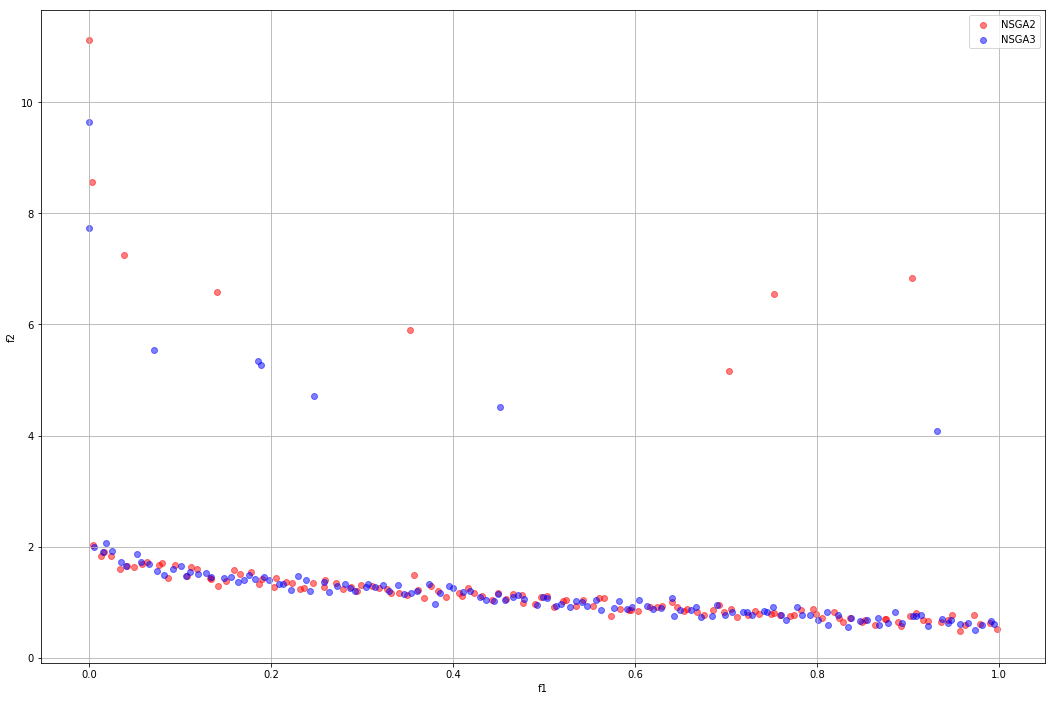

In [458]:
x =  np.linspace(0, 1, 150)
y = 1 - np.sqrt(x)

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
#ax.plot(x, y, color="blue", label="The Pareto front")
ax.scatter(front2[:, 0], front2[:, 1], c="r", alpha = 0.5, label="NSGA2")
ax.scatter(front3[:, 0], front3[:, 1], c="b", alpha =0.5, label = "NSGA3")
#ax.set_title("Solution of ZDT1")
ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.legend()
ax.grid(True)
#plt.xlim((0,1))
#plt.ylim((0,1))